___
Team Member Names
- Name 1: Matthew D. Cusack
- Name 2: Tim Cabaza
- Name 3: Amy Adyanthaya

<a id="top"></a>
________
# Classification
____

## Contents
* <a href="#DataPrep1">Data Preparation Part 1</a>
* <a href="#DataPrep2">Data Preparation Part 2</a>
* <a href="#ModelEval1">Modeling and Evaluation 1</a>
* <a href="#ModelEval2">Modeling and Evaluation 2</a>
* <a href="#ModelEval3">Modeling and Evaluation 3</a>
    * <a href="#RFmodel">Random Forest Model</a>
    * <a href="#KNNmodel">KNN Model</a>
    * <a href="#SVMmodel">SVM Model</a>
* <a href="#ModelEval4">Modeling and Evaluation 4</a>
* <a href="#ModelEval5">Modeling and Evaluation 5</a>
    * <a href="#TaskEval">Comparing Task Performance Between Different Types of Models</a>
        * <a href="#sqrTask">On "share_quantile_range" Task</a>
        * <a href="#dowTask">On "day_of_week" Task</a>
* <a href="#ModelEval6">Modeling and Evaluation 6</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>
    * <a href="#ncTask">Comparing Task Performance Between Different Types of ModelsOn "news_category" Task</a>
    * <a href="#ScalerEval">Comparing the StandardScalar and QuantileTransformer Versions of The Models</a>
        * <a href="#RFEval">Random Forest Models</a>
        * <a href="#KNNEval">KNN Models</a>
        * <a href="#SVMEval">SVM Models</a>
_______

In [281]:
# 1


# Load Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this import allows you train and test you test split
from sklearn.model_selection import train_test_split
# this import allows you to standardize your data, scaling so that all features have a mean of zero and a standard deviation of 1. 
from sklearn.preprocessing import StandardScaler, QuantileTransformer
# this import allows you to create a logistic regression model; type of machine learning model that can be used for classification tasks 
from sklearn.linear_model import LogisticRegression
# this import allows you to create a support vector machine SVM model, a type of ML model that can be used for classification tasks. 
from sklearn.svm import SVC
# this import allows you to perform CV on your model, a technique for evaluating the performance of a ML on unseen data
from sklearn.model_selection import cross_val_score
# these imports allow you to calculate various evaluation metrics for your ML model. Eval metrics are used to asses the performance of a ML on held-out test set. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# for testing differences with 95% confidence
from scipy.stats import ttest_rel
# for RandomForest models
from sklearn.ensemble import RandomForestClassifier
# for KNN models
from sklearn.neighbors import KNeighborsClassifier
# for feature selection
from sklearn.feature_selection import SequentialFeatureSelector

In [282]:
# 2

# file path
file_path = "../1 - Visualization and Data Preprocessing/Data/ONPClean2.csv" # previously cleaned
# file_path = '../1 - Visualization and Data Preprocessing/Data/OnlineNewsPopularity.csv' # unclean

# Load the dataset
df = pd.read_csv(file_path)

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)
df.head()

,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


_________
<a href="#top">Back to Top</a>
<a id="DataPrep1"></a>
# Data Preparation Part 1

## Class Variables

In [283]:
# 3

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url_name                        39644 non-null  object 
 1   date                            39644 non-null  object 
 2   timedelta                       39644 non-null  float64
 3   n_tokens_title                  39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   average_token_length            39644 non-null  float64
 6   num_keywords                    39644 non-null  float64
 7   kw_min_min                      39644 non-null  float64
 8   kw_avg_min                      39644 non-null  float64
 9   kw_max_max                      39644 non-null  float64
 10  kw_avg_max                      39644 non-null  float64
 11  kw_min_avg                      39644 non-null  float64
 12  kw_max_avg                      

##### Original (before any cleaning):
url:        
    Containes the url of the article with the date      
    Object

timedelta:               
    Days between the article publication and the dataset acquisition (non-predictive)               
    float64

n_tokens_title:               
    Number of words in the title               
    float64

n_tokens_content:               
    Number of words in the content               
    float64

n_unique_tokens:               
    Rate of unique words in the content               
    float64

n_non_stop_words:           
    Rate of non-stop words in the content           
    float64

n_non_stop_unique_tokens:      
    Rate of unique non-stop words in the content      
    float64

num_hrefs:                    
    Number of links                 
    float64

num_self_hrefs:               
    Number of links to other articles published by Mashable            
    float64

num_imgs:                      
    Number of images        
    float64

num_videos:                    
    Number of videos            
    float64
    
average_token_length:               
    Average length of the words in the content               
    Float64

num_keywords:               
    Number of keywords in the metadata               
    float64

data_channel_is_lifestyle:     
    Is data channel 'Lifestyle'?            
    Binary (Yes = 1 / No = 0)       
    float64

data_channel_is_entertainment:          
    Is data channel 'Entertainment'?            
    Binary (Yes = 1 / No = 0)       
    float64

data_channel_is_bus:           
    Is data channel 'Business'?         
    Binary (Yes = 1 / No = 0)       
    float64
  
data_channel_is_socmed:        
    Is data channel 'Social Media'?             
    Binary (Yes = 1 / No = 0)       
    float64
   
data_channel_is_tech:          
    Is data channel 'Tech'?             
    Binary (Yes = 1 / No = 0)       
    float64
 
data_channel_is_world:         
    Is data channel 'World'?        
    Binary (Yes = 1 / No = 0)       
    float64
 
kw_min_min:               
    Worst keyword (min. shares)               
    float64

kw_max_min:                    
    Worst keyword (max. shares)         
    float64

kw_avg_min:                    
    Worst keyword (avg. shares)               
    float64

kw_min_max:                    
    Best keyword (min. shares)          
    float64

kw_max_max:                    
    Best keyword (max. shares)               
    float64

kw_avg_max:                    
    Best keyword (avg. shares)               
    float64

kw_min_avg:                    
    Avg. keyword (min. shares)               
    float64

kw_max_avg:                    
    Avg. keyword (max. shares)               
    float64

kw_avg_avg:                    
    Avg. keyword (avg. shares)          
    float64

self_reference_min_shares:    
    Min. shares of referenced articles in Mashable          
    float64

self_reference_max_shares:     
    Max. shares of referenced articles in Mashable          
    float64

self_reference_avg_sharess:   
    Avg. shares of referenced articles in Mashable          
    float64

weekday_is_monday:             
    Was the article published on a Monday?          
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_tuesday:            
    Was the article published on a Tuesday?             
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_wednesday:          
    Was the article published on a Wednesday?               
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_thursday:           
    Was the article published on a Thursday?            
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_friday:             
    Was the article published on a Friday?          
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_saturday:           
    Was the article published on a Saturday?            
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_sunday:              
    Was the article published on a Sunday?          
    Binary (Yes = 1 / No = 0)       
    float64

is_weekend:                    
    Was the article published on the weekend?               
    Binary (Yes = 1 / No = 0)       
    float64

LDA_00:                        
    LDA topic modeling 
    Closeness to LDA topic 0               
    float64

LDA_01:                       
    Closeness to LDA topic 1               
    float64

LDA_02:                        
    Closeness to LDA topic 2               
    float64

LDA_03:                       
    Closeness to LDA topic 3               
    float64

LDA_04:                        
    Closeness to LDA topic 4               
    float64

global_subjectivity:           
    Text subjectivity               
    float64

global_sentiment_polarity:     
    Text sentiment polarity               
    float64

global_rate_positive_words:    
    Rate of positive words in the content               
    float64

global_rate_negative_words:    
    Rate of negative words in the content               
    float64

rate_positive_words:           
    Rate of positive words among non-neutral tokens               
    float64

rate_negative_words:           
    Rate of negative words among non-neutral tokens               
    float64

avg_positive_polarity:         
    Avg. polarity of positive words               
    float64

min_positive_polarity:         
    Min. polarity of positive words               
    float64

max_positive_polarity:         
    Max. polarity of positive words               
    float64

avg_negative_polarity:         
    Avg. polarity of negative  words               
    float64

min_negative_polarity:         
    Min. polarity of negative  words               
    float64

max_negative_polarity:         
    Max. polarity of negative  words               
    float64

title_subjectivity:            
    Title subjectivity               
    float64

title_sentiment_polarity:      
    Title polarity               
    float64

abs_title_subjectivity:        
    Absolute subjectivity level               
    float64

abs_title_sentiment_polarity:  
    Absolute polarity level               
    float64

shares:                        
    Number of shares (target)               
    Integer

##### Newly Created (after preeviously cleaning & transformations):
url_name:               
    URL of the article (non-predictive)               
    Float

Date:               
    The date the article was published               
    DateTime

Day_of_week:               
    What day of the week the article is posted on               
    Categorical

news_category:               
    What news category the article is               
    Categorical

Year:               
    The year the article was published               
    Integer

Month:               
    The month the aticle was published               
    Integer

log_shares:               
    log of the "shares" variable               
    Float

log_n_tokens_content:               
    log of the "n_tokens_content" variable               
    Float

log_num_hrefs:               
    log of the "num_hrefs" variable               
    Float

log_num_self_hrefs:               
    log of the "num_self_hrefs" variable               
    Float

log_num_imgs:               
    log of the "num_imgs" variable               
    Float

log_num_videos:               
    log of the "num_videos" variable               
    Float

log_kw_max_min:               
    log of the "kw_max_min" variable               
    Float

log_kw_min_max:               
    log of the "kw_min_max" variable               
    Float

log_kw_avg_avg:               
    log of the "kw_avg_avg" variable               
    Float

log_self_reference_min_shares:               
    log of the "self_reference_min_shares" variable               
    Float

log_self_reference_max_shares:               
    log of the "self_reference_max_shares" variable               
    Float

log_self_reference_avg_shares:               
    log of the "self_reference_avg_shares" variable               
    Float

day_of_weekX where X is the day of the week
    a binary value meaning either Yes (1) it is day X or No (0) it is not day x
     

### Data Pre-Processing

If your dataset has outliers, you may want to remove them before training your model, as outliers can skew the results of the model.

In [284]:
# 4

# Remove certain columns before dimensionality reduction can take place

# drop certain columns
df1 = df.drop('url_name', axis=1) # was a string and not helpful
df1 = df1.drop('date', axis=1) # datetime change didn't work.
df1 = df1.drop('log_shares', axis=1) # not as useful

#Factor columns that need it for certain models
# Factor the `news_category` column for other two tasks.
# df1 = pd.get_dummies(df1, drop_first=False,columns=['news_category'])

# Factor the `day_of_week` column for other two tasks.
# df1 = pd.get_dummies(df1, columns=['day_of_week'], drop_first=False)

# drop Na's
df1.dropna()

df1.head()

,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


In [285]:
# 5 

# Create share_quantile_ranges_variable for target

# Create bins using quantiles
q1 = df1['shares'].quantile(0.25)
q2 = df1['shares'].quantile(0.5)
q3 = df1['shares'].quantile(0.75)

# Define the bin labels
labels = ['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3']

# Cut the shares column into bins
df1['share_quantile_ranges'] = pd.cut(df1['shares'], bins=[0, q1, q2, q3, 1000000], labels=labels)

###  Initially a 80/20 test split was used for modeling our data but a Stratified Kfold was ultimately chosen as the more appropriate method as you will see in the next few cells. 

In [286]:
# 6 

X = df1.drop(['share_quantile_ranges', 'day_of_week', 'news_category'], axis=1)
y = df1['share_quantile_ranges']
print(X.columns)
print(y)

# Training Test 80/20 Split
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Index(['timedelta', 'n_tokens_title', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_avg_min',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'year', 'month',
       'log_n_tokens_content', 'log_num_hrefs', 'log_num_self_hrefs',
       'log_num_imgs', 'log_num_videos', 'log_kw_max_min', 'log_kw_min_max',
       'log_kw_avg_avg', 'log_self_reference_min_shares',
       'log_self_reference_max_shares

### Scaling data

In [287]:
# 7 

# Scale the features in the training and testing sets using standard scalar.
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 8

# Scale the features using QuantileTransformer with n_quantiles=100 AFTER using StandardScalar().
quantile_transformer = QuantileTransformer(n_quantiles=100)

X_train_q = quantile_transformer.fit_transform(X_train)
X_test_q = scaler.transform(X_test)

#### Scaling is done on the training and testing sets "X_train" and "X_test" in order put the data on a common scale. This is helpful in improving the model performance as they  arre sensitive to the scale of the data. Scaling will be done for each classification task and both types of scaling will be done on the data seperately so that the two methods can be compared later.


#### Overall scaling is important for some model types. Random forest classification models are powerful and are completely invariant to the scaling of data. SVMs on the other hand are sensitive to the scaling of data; for kernal SVMs it is common to scale the data between 0 and 1 for all features. KNN is also sensitive to scaling as KNN chooses the k closest neighbor and then based off those neighbors assigns a class. KNN is a distance based algorithm that is sensitive to the magnitudes of the features.  

## Reduce Variables:

### The following variables within the Mashable datatset were deemed unnecessary during lab 1 and were removed during the course of this labs notebook.





Url:        
    Dropped as it was better served being split into multiple variables.            
    These varriables did end up not being useful or useable, however.  

n_tokens_content:           
    was removed after being log transformed.            
    This helped with the very skewed data.

n_non_stop_words:              
    Deemed unhelpful

n_non_stop_unique_tokens:           
    Deemed unhelpful

num_hrefs:          
    was removed after being log transformed.            
    This helped with the very skewed data.

num_self_hrefs:         
    was removed after being log transformed.            
    This helped with the very skewed data.
    
num_imgs:           
    was removed after being log transformed.            
    This helped with the very skewed data.

num_videos:         
    was removed after being log transformed.            
    This helped with the very skewed data.

kw_max_min:         
    was removed after being log transformed.            
    This helped with the very skewed data.

kw_min_max:         
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_min_shares:          
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_max_shares:          
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_avg_sharess:             
    was removed after being log transformed.            
    This helped with the very skewed data.

weekday_is_X where X is the day of the week:        
    Removed previously.         
    This was to turn it into a categorical variable for the model being run at the time.        
    This variable has been recreated for our current classification problems as shown above with the factoring of day_of_week.      

data_channel_is_X where X is the type of data channel:      
    Removed previously.     
    This was to turn it into a categorical variable for the model being run at the time.        
    This variable has been recreated for our current classification problems as shown above with the factoring of news_category.        

In [ ]:
# 9

# The following variables were removed in lab1 when we first worked with the Mashable dataset

# drop certain columns
# Done above
# df1 = df.drop('url_name', axis=1) # was a string
# df1 = df1.drop('date', axis=1) # datetime change didn't work.
# df1 = df1.drop('log_shares', axis=1) # not useful

# drop Na's
df1.dropna()

df1.head()

url_name:           
    Dropped due to it being a string variable that wasn't useful

date:
    Dropped due to it being a datetime variable that wasn't useful

log_shares:           
    The share_quantile_ranges was deemed to be more useful.

A sanity check was completed to make sure no Na's were captured in the dataset. The dataset was clean with no Na's 

The following features will be excluded when selecting the target variable for our modeling: shares, day_of_week, and news_category. Variables that are highly correlated with the target variable will create modeling results that are overly optimistic and by strategically eliminating them we avoid overfitting by giving the model the correct answer to what its trying to predict.  

##### Feature Selection

In [ ]:
# 10


# Load the data
X = df1.drop(['share_quantile_ranges', 'shares', 'day_of_week', 'news_category'], axis=1) 
y = df1['share_quantile_ranges']

# Initialize the sequential feature selector
sfs = SequentialFeatureSelector(estimator=LogisticRegression(), scoring='f1_macro', n_jobs=-1)

# Fit the selector to the data
sfs.fit(X, y)

# Get the selected features
selected_features = sfs.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X.columns[selected_features]

# Print the column names of the selected features
print(selected_feature_names)

##### Using feature selection with a LogisticRegression estimator several variables were able to be removed. The following variables were deemed unimportant to the model:

    'timedelta'
    'n_tokens_title'
    'average_token_length'   
    'num_keywords'
    'kw_min_min'
    'kw_avg_min'
    'kw_max_max'
    'kw_avg_max' 
    'kw_min_avg'
    'kw_max_avg'
    'LDA_00'
    'LDA_04'
    'global_sentiment_polarity'
    'rate_negative_words'
    'title_subjectivity'
    'shares'
    'month'
    'log_n_tokens_content'
    'log_num_hrefs'  
    'log_num_self_hrefs'
    'log_num_imgs'
    'log_num_videos'
    'log_kw_max_min'
    'log_self_reference_min_shares'

##### Using feature selection with a LogisticRegression estimator the following variables were deemed most important to the model:
    'n_unique_tokens'
    'is_weekend'
    'LDA_01'
    'LDA_02'
    'LDA_03'
    'global_subjectivity'
    'global_rate_positive_words'
    'global_rate_negative_words'
    'rate_positive_words'
    'avg_positive_polarity
    'min_positive_polarity'
    'max_positive_polarity'
    'avg_negative_polarity'
    'min_negative_polarity'
    'max_negative_polarity'
    'title_sentiment_polarity'
    'abs_title_subjectivity'
    'abs_title_sentiment_polarity
    'year'
    'log_kw_min_max'
    'log_kw_avg_avg'
    'log_self_reference_max_shares'
    'log_self_reference_avg_sharess

In [ ]:
# 11


# Load the data
X = df1.drop(['share_quantile_ranges', 'shares', 'day_of_week', 'news_category'], axis=1) 
y = df1['share_quantile_ranges']

# Initialize the sequential feature selector
sfs = SequentialFeatureSelector(estimator=RandomForestClassifier(), scoring='f1_macro', n_jobs=-1)

# Fit the selector to the data
sfs.fit(X, y)

# Get the selected features
selected_features = sfs.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X.columns[selected_features]

# Print the column names of the selected features
print(selected_feature_names)

##### Using feature selection with a RandomForest estimator several variables were able to be removed. The following variables were deemed unimportant to the model:

    'timedelta'
    'n_tokens_title'
    'average_token_length'
    'kw_min_min'
    'kw_max_max'
    'kw_avg_max'
    'kw_max_avg'
    'LDA_01'
    'LDA_02'
    'global_rate_negative_words'
    'rate_positive_words'
    'rate_negative_words'
    'min_positive_polarity'
    'avg_negative_polarity'
    'min_negative_polarity'
    'max_negative_polarity'
    'title_sentiment_polarity'
    'abs_title_subjectivity'
    'shares'
    'year'
    'month'
    'log_num_videos'
    'log_kw_min_max'
    'log_self_reference_max_shares'

##### Using feature selection with a RandomForest estimator the following variables were deemed most important to the model:
    'n_unique_tokens'
    'num_keywords'
    'kw_avg_min'
    'kw_min_avg'
    'is_weekend'
    'LDA_00'
    'LDA_03'
    'LDA_04'
    'global_subjectivity'
    'global_sentiment_polarity'
    'global_rate_positive_words'
    'avg_positive_polarity'
    'max_positive_polarity'
    'title_subjectivity'
    'abs_title_sentiment_polarity'
    'log_n_tokens_content'
    'log_num_hrefs'
    'log_num_self_hrefs'
    'log_num_imgs'
    'log_kw_max_min'
    'log_kw_avg_avg'
    'log_self_reference_min_shares'
    'log_self_reference_avg_sharess'

In [ ]:
# 12 

# Load the data
X = df1.drop(['share_quantile_ranges', 'shares', 'day_of_week', 'news_category'], axis=1) 
y = df1['share_quantile_ranges']

# Initialize the sequential feature selector
sfs = SequentialFeatureSelector(estimator=KNeighborsClassifier(), scoring='f1_macro', n_jobs=-1)

# Fit the selector to the data
sfs.fit(X, y)

# Get the selected features
selected_features = sfs.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X.columns[selected_features]

# Print the column names of the selected features
print(selected_feature_names)

Using feature selection with a KNN estimator several variables were able to be removed. The following variables were deemed unimportant to the model:

    'timedelta'
    'n_tokens_title'
    'average_token_length'
    'num_keywords'
    'kw_min_min'
    'kw_avg_min'
    'kw_max_max'
    'kw_avg_max'
    'kw_min_avg'
    'kw_max_avg'
    'max_positive_polarity'
    'avg_negative_polarity'
    'min_negative_polarity'
    'title_subjectivity'
    'title_sentiment_polarity'
    'abs_title_subjectivity'
    'shares'
    'year'
    'month'
    'log_num_self_hrefs'
    'log_num_imgs'
    'log_kw_max_min'
    'log_kw_min_max'
    'log_self_reference_min_shares'

##### Using feature selection with a KNN estimator the following variables were deemed most important to the model:
    'n_unique_tokens'
    'is_weekend'
    'LDA_00'
    'LDA_01'
    'LDA_02'
    'LDA_03'
    'LDA_04'
    'global_subjectivity'
    'global_sentiment_polarity',
    'global_rate_positive_words'
    'global_rate_negative_words'
    'rate_positive_words'
    'rate_negative_words'
    'avg_positive_polarity'
    'min_positive_polarity'
    'max_negative_polarity'
    'abs_title_sentiment_polarity'
    'log_n_tokens_content'
    'log_num_hrefs'
    'log_num_videos'
    'log_kw_avg_avg'
    'log_self_reference_max_shares'
    'log_self_reference_avg_sharess'

In [ ]:
# 13 


# Load the data
X = df1.drop(['share_quantile_ranges', 'shares', 'day_of_week', 'news_category'], axis=1) 
y = df1['share_quantile_ranges']

# Initialize the sequential feature selector
sfs = SequentialFeatureSelector(estimator=SVC(C=1, kernel="linear"), scoring='f1_macro', n_jobs=-1)

# Fit the selector to the data
sfs.fit(X, y)

# Get the selected features
selected_features = sfs.get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X.columns[selected_features]

# Print the column names of the selected features
print(selected_feature_names)

##### Using feature selection with a SVM estimator several variables were able to be removed. The following variables were deemed unimportant to the model:

    'timedelta'
    'n_tokens_title'
    'n_unique_tokens'
    'average_token_length'
    'num_keywords'
    'kw_min_min'
    'kw_avg_min'
    'kw_max_max'
    'kw_avg_max'
    'kw_min_avg'
    'kw_max_avg'
    'is_weekend'
    'LDA_00'
    'LDA_01'
    'LDA_02'
    'LDA_03'
    'LDA_04'
    'global_subjectivity'
    'global_sentiment_polarity'
    'global_rate_positive_words'
    'global_rate_negative_words'
    'rate_positive_words'
    'rate_negative_words'
    'avg_positive_polarity'
    'min_positive_polarity'
    'max_positive_polarity'
    'avg_negative_polarity'
    'min_negative_polarity'
    'max_negative_polarity'
    'title_subjectivity'
    'title_sentiment_polarity'
    'abs_title_subjectivity'
    'abs_title_sentiment_polarity'
    'shares'
    'year'
    'month'
    'log_n_tokens_content'
    'log_num_hrefs'
    'log_num_self_hrefs'
    'log_num_imgs'
    'log_num_videos'
    'log_kw_max_min'
    'log_kw_min_max'
    'log_kw_avg_avg'
    'log_self_reference_min_shares'
    'log_self_reference_max_shares'
    'log_self_reference_avg_sharess'


##### Using feature selection with a SVM estimator the following variables were deemed most important to the model:
After 20 hours the feature selection had still not returned any results. Due to this, we will be using a mix of previous selected features to improve the model.

_________________
<a href="#top">Back to Top</a>
<a id="DataPrep2"></a>
# Data Preperation Part 2

## Describe the final dataset that is used for classification/regression


### share_quantile_ranges

Q1-Q2    10152
Q2-Q3     9932
<Q1       9930
>Q3       9630
Name: share_quantile_ranges, dtype: int64


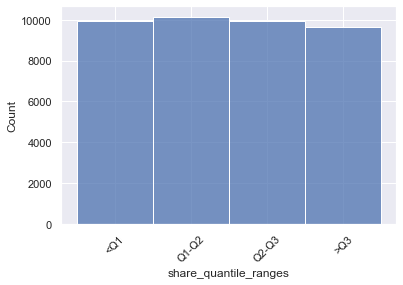

In [9]:
# 14 


# # Create bins using quantiles
# q1 = df1['shares'].quantile(0.25)
# q2 = df1['shares'].quantile(0.5)
# q3 = df1['shares'].quantile(0.75)

# # Define the bin labels
# labels = ['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3']

# # Cut the shares column into bins
# df1['share_quantile_ranges'] = pd.cut(df1['shares'], bins=[0, q1, q2, q3, 1000000], labels=labels)

import seaborn as sns
import matplotlib.pyplot as plt
# Print the value counts of the share_ranges_quantile column
print(df1['share_quantile_ranges'].value_counts())
# Create bins using quantiles
q1 = df['shares'].quantile(0.25)
q2 = df['shares'].quantile(0.5)
q3 = df['shares'].quantile(0.75)

# Define the bin labels
labels = ['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3']

# Cut the shares column into bins
df['share_quantile_ranges'] = pd.cut(df['shares'], bins=[0, q1, q2, q3, 1000000], labels=labels)

sns.set(style="darkgrid")
sns.histplot(data=df, x="share_quantile_ranges", discrete=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.xlabel("share_quantile_ranges")
plt.show()

share_quantile_ranges: This was created by splitting up the shares variable into bins by using its different quantile values. This allowed for a more even split among the groups. The distribution between quantiles is fairly evenwith Q1-Q2 and >Q3 having the greatest difference in count. 

### factoring day_of_week

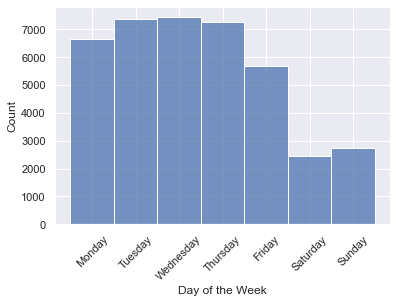

In [10]:
# 15 


# Factor the `day_of_week` column.
# df1 = pd.get_dummies(df1, columns=['day_of_week'])
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.histplot(data=df, x="day_of_week", discrete=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.xlabel("Day of the Week")
plt.show()

factored day_of_week columns: day_of_week was factored back into 7 columns of 0's and 1's similar to how it was in the original dataset. The data is right skewed with the mode roughly Wednesday, Thursday. 

### factoring news_category

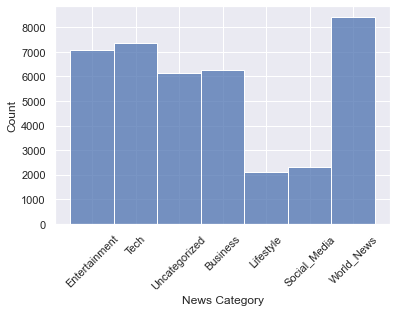

In [12]:
#16


# # Factor the `news_category` column.
# df1 = pd.get_dummies(df1, columns=['news_category'])
# Histogram of Existing Categorical Variables before encoding 

# We will need to one hot encode 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.histplot(data=df, x="news_category", discrete=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.xlabel("News Category")
plt.show()



factored news_category columns: day_of_week was factored back into 6 columns of 0's and 1's representative if it is that day or not similar to how it was in the original dataset. World News is the highest frequency news category. 

In [74]:
# 17 

df1.describe()

,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,year,month,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,0.548216,4.548239,7.223767,26.106801,312.366967,752324.066694,259281.938083,1117.146610,5657.211151,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,2013.540939,6.615856,5.889971,2.156564,1.208878,1.116427,0.400420,6.393888,5.045209,7.976327,6.195185,6.917477,6.667697
std,214.163767,2.114037,3.520708,0.844406,1.909130,69.633215,620.783887,214502.129573,135102.247285,1137.456951,6098.871957,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.498327,3.390683,1.255442,0.809445,0.692698,0.973755,0.680486,1.311168,4.521016,0.489467,3.076913,3.432430,3.280186
min,8.000000,2.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,2013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.000000,9.000000,0.470870,4.478404,6.000000,-1.000000,141.750000,843300.000000,172846.875000,0.000000,3562.101631,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,2013.000000,4.000000,5.509388,1.609438,0.693147,0.693147,0.000000,6.100319,0.000000,7.776304,6.461468,7.003974,6.889782
50%,339.000000,10.000000,0.539226,4.664082,7.000000,-1.000000,235.500000,843300.000000,244572.222223,1023.635611,4355.688836,0.000000,0.033387,0.033345,0.040004,0.040001,0.040727,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,2014.000000,7.000000,6.016157,2.197225,1.386294,0.693147,0.000000,6.493754,7.244942,7.962442,7.090910,7.937732,7.696667
75%,542.000000,12.000000,0.608696,4.854839,9.000000,4.000000,357.000000,843300.000000,330980.000000,2056.781032,6019.953968,0.000000,0.240958,0.150831,0.334218,0.375763,0.399986,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.0

________________
<a href="#top">Back to Top</a>
<a id="ModelEval1"></a>
# Modeling and Evaluation 1 

## Evaluation Metrics:

F1 score was chosen as our most important evaluation metric for analyzing the results of the modeling.

F1 Score balances both precision and recall on the positive class which is ideal for this type of classification problem that predicts popularity based off shares, day of week, or news category as it is easy to interpret and communicate to our stakeholder Mashable. 

Accuracy is also tracked as it does provide correctly classified observations and it is important to note but it is not the most significant metric in our final analysis of the models.

Overall F1 is the most appropriate metric for our modeling in order to avoid overfitting issues due to any imbalances in the dataset.

________________
<a href="#top">Back to Top</a>
<a id="ModelEval2"></a>
# Modeling and Evaluation 2 

## Dividing your data into training and testing splits:




### Our modeling uses 10-fold stratified cross validation for training and testing split to have more reliable estimates of the models' generalized performance. 
    
### It ensures that the training and testing splits are representative of the overall dataset and avoids overfitting the model to the training data. It reduces the risk of variance. This is because the model is trained and evaluated on 10 different folds of the data, rather than just a single split. Overall cross validation is the most appropriate approach to splitting the dataset into a training set for model building, validation set for model and parameter selection, and test set for model evaluation. 

### Cross validation can also be useful in other ways such as comparing different machine learning models or estimate confidence intervals for a model's performance.


In [288]:
# 18 

from sklearn.model_selection import StratifiedKFold

random_state = 42

# Create a StratifiedKFold object with n_splits=10
# kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state = random_state)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = random_state)


## Tasks

### Task 1: share_quantile_ranges 

In [ ]:
# 19 Matt's Version 

# Remove target, related variables, and factor other targets due to them being categorical
# import numpy as np
# X0 = pd.get_dummies(df1, columns=['day_of_week'])
# X0 = pd.get_dummies(X0, columns=['news_category'])
# X1 = X0.drop(['share_quantile_ranges', 'shares'], axis=1) 
# y1 = X0['share_quantile_ranges']



In [99]:
# 20 MATT's Version - i could not get it to work 

# Create a StratifiedKFold object with n_splits=10
# X_train1, X_test1, y_train1, y_test1 = [], [], [], []
# for train_index, test_index in kfold.split(X1, y1):
#     X_train1.append(X1[train_index])
#     X_test1.append(X1[test_index])
#     y_train1.append(y1[train_index])
#     y_test1.append(y1[test_index])


In [289]:
# 21 Tim's Version 

# Remove target, related variables, and factor other targets due to them being categorical
import numpy as np
X0 = pd.get_dummies(df1, columns=['day_of_week'])
X0 = pd.get_dummies(X0, columns=['news_category'])
X1 = X0.drop(['share_quantile_ranges', 'shares'], axis=1) 
y1 = X0.loc[:,'share_quantile_ranges']

In [290]:
# 22 TIMs Version 

X_train1, X_test1, y_train1, y_test1 = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X1, y1)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_train1.append(np.array(X1.iloc[train_index].to_numpy()))
    X_test1.append(np.array(X1.iloc[test_index].to_numpy()))
    y_train1.append(np.array(y1.iloc[train_index].to_numpy()))
    y_test1.append(np.array(y1.iloc[test_index].to_numpy()))
    

Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    9    19    23 ... 39630 39636 39639]
Fold 1:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   26    27    29 ... 39570 39592 39621]
Fold 2:
  Train: index=[    1     2     3 ... 39641 39642 39643]
  Test:  index=[    0     5    16 ... 39593 39600 39615]
Fold 3:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    4    10    11 ... 39574 39614 39638]
Fold 4:
  Train: index=[    0     3     4 ... 39641 39642 39643]
  Test:  index=[    1     2     6 ... 39589 39596 39611]
Fold 5:
  Train: index=[    0     1     2 ... 39639 39640 39642]
  Test:  index=[   33    42    49 ... 39637 39641 39643]
Fold 6:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    3    15    31 ... 39584 39608 39635]
Fold 7:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    7    20    57 ... 39633 39634 39640]
Fold 8:
  Train: index=[

In [291]:
# 23  TIMs Version 

# Understanding the shape of the fold 

for i in range(1):  # This will get the shapes for the first two folds

    train_shape = X_train1[i].shape
    test_shape = X_test1[i].shape
    train_labels_shape = y_train1[i].shape
    test_labels_shape = y_test1[i].shape

    
    print(f"           Test Split Shapes " )
    print(f"----------------------------------------")
    print(f"Fold {i} : X_train1 set shape: {train_shape}")
    print(f"Fold {i} : X_test1 set shape: {test_shape}")
    print(f"Fold {i} : y_train1 labels shape: {train_labels_shape}")
    print(f"Fold {i} : y_test1 labels shape: {test_labels_shape}")


           Test Split Shapes 
----------------------------------------
Fold 0 : X_train1 set shape: (35679, 60)
Fold 0 : X_test1 set shape: (3965, 60)
Fold 0 : y_train1 labels shape: (35679,)
Fold 0 : y_test1 labels shape: (3965,)


### Task 2: day_of_week 

In [ ]:
# 24 Matt's Version 

# Remove target, related variables, and factor other targets due to them being categorical
# X0 = pd.get_dummies(df1, columns=['news_category'])
# X2 = X0.drop(['share_quantile_ranges', 'day_of_week'], axis=1) # Removing target categorical variable and other categorical variables
# y2 = X0['day_of_week']


In [30]:
# 25 Matt's Version -- couldn't get to work 

# Split the data into training and testing folds
# X_train2, X_test2, y_train2, y_test2 = [], [], [], []
# for train_index, test_index in kfold.split(X2, y2):
#     X_train2.append(X2[train_index])
#     X_test2.append(X2[test_index])
#     y_train2.append(y2[train_index])
#     y_test2.append(y2[test_index])


In [ ]:
# 26 Tim's Version 

# Remove target, related variables, and factor other targets due to them being categorical
X0 = pd.get_dummies(df1, columns=['news_category'])
X2 = X0.drop(['share_quantile_ranges', 'day_of_week'], axis=1) # Removing target categorical variable and other categorical variables
y2 = X0.loc[:,'day_of_week']

In [32]:
# 27 TIMs Version 

X_train2, X_test2, y_train2, y_test2 = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X2, y2)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_train2.append(np.array(X2.iloc[train_index].to_numpy()))
    X_test2.append(np.array(X2.iloc[test_index].to_numpy()))
    y_train2.append(np.array(y2.iloc[train_index].to_numpy()))
    y_test2.append(np.array(y2.iloc[test_index].to_numpy()))

Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    7    16    37 ... 39623 39632 39636]
Fold 1:
  Train: index=[    0     1     3 ... 39640 39642 39643]
  Test:  index=[    2    12    18 ... 39630 39631 39641]
Fold 2:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   19    22    62 ... 39565 39586 39619]
Fold 3:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   61    64    72 ... 39624 39634 39640]
Fold 4:
  Train: index=[    0     2     4 ... 39641 39642 39643]
  Test:  index=[    1     3     8 ... 39626 39627 39633]
Fold 5:
  Train: index=[    0     1     2 ... 39640 39641 39642]
  Test:  index=[   21    44    47 ... 39600 39628 39643]
Fold 6:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   14    28    34 ... 39625 39635 39637]
Fold 7:
  Train: index=[    1     2     3 ... 39641 39642 39643]
  Test:  index=[    0    10    11 ... 39605 39618 39639]
Fold 8:
  Train: index=[

### Extra Task 3: news_category

In [ ]:
# 28 Matt's Version 

# Splitting the Data for news_category task and other targets due to them being categorical
# X0 = pd.get_dummies(df1, columns=['day_of_week'])
# X3 = X0.drop(['share_quantile_ranges', 'news_category'], axis=1) # Removing target categorical variable and other categorical variables
# # y3 = X0['news_category']
# # print(X2.columns)
# # print(y2)

In [34]:
# 29Matt's Version -- couldn't get to work 

# Split the data into training and testing folds
# X_train3, X_test3, y_train3, y_test3 = [], [], [], []
# for train_index, test_index in kfold.split(X3, y3):
#     X_train3.append(X3[train_index])
#     X_test3.append(X3[test_index])
#     y_train3.append(y3[train_index])
#     y_test3.append(y3[test_index])

In [ ]:
#  30 Tim's Version 

# Splitting the Data for news_category task and other targets due to them being categorical
X0 = pd.get_dummies(df1, columns=['day_of_week'])
X3 = X0.drop(['share_quantile_ranges', 'news_category'], axis=1) # Removing target categorical variable and other categorical variables
y3 = X0.loc[:,'news_category']

In [35]:
# 31 TIMs Version 

X_train3, X_test3, y_train3, y_test3 = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X3, y3)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_train3.append(np.array(X3.iloc[train_index].to_numpy()))
    X_test3.append(np.array(X3.iloc[test_index].to_numpy()))
    y_train3.append(np.array(y3.iloc[train_index].to_numpy()))
    y_test3.append(np.array(y3.iloc[test_index].to_numpy()))
    

Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    7    21    33 ... 39620 39626 39627]
Fold 1:
  Train: index=[    0     2     3 ... 39640 39641 39642]
  Test:  index=[    1    11    32 ... 39600 39628 39643]
Fold 2:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    9    13    14 ... 39630 39634 39635]
Fold 3:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    4    17    22 ... 39625 39631 39639]
Fold 4:
  Train: index=[    1     2     3 ... 39641 39642 39643]
  Test:  index=[    0     6    12 ... 39603 39605 39607]
Fold 5:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   24    25    45 ... 39622 39624 39637]
Fold 6:
  Train: index=[    0     1     3 ... 39640 39641 39643]
  Test:  index=[    2    15    18 ... 39632 39633 39642]
Fold 7:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    3    10    20 ... 39629 39636 39638]
Fold 8:
  Train: index=[

________________
<a href="#top">Back to Top</a>
<a id="ModelEval3"></a>
# Modeling and Evaluation 3 (20 points total)

## Scaling the Dataset

In [ ]:
# 32

# Scale the features in the training and testing sets using StandardScalar.
scaler = StandardScaler()
import numpy as np  # Assuming you are using NumPy for your data
# Use previous train/test split
# for share_quantile_range_task
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# for day_of_week task
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# for news_category task
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [ ]:
# 33 

# Scale the features in the training and testing sets using QuantileTransformer after using StandardScalar.
quantile_transformer = QuantileTransformer(n_quantiles=100)

# # Use previous train/test split

# # for share_quantile_range_task
X_train_q1 = quantile_transformer.fit_transform(X_train1)
X_test_q1 = quantile_transformer.fit_transform(X_test1)

# for day_of_week task
X_train_q2 = quantile_transformer.fit_transform(X_train2)
X_test_q2 = quantile_transformer.fit_transform(X_test2)

# for news_category task
X_train_q3 = quantile_transformer.fit_transform(X_train3)
X_test_q3 = quantile_transformer.fit_transform(X_test3)

________________
<a href="#top">Back to Top</a>
## Create three different classification/regression models
<a id="RFmodel"></a>
### Random Forest

##### Task 1: share_quantile_ranges

In [88]:
# 34 Matts Version 

# Create the random forest model
# rf = RandomForestClassifier(n_estimators=100)


In [ ]:
# 35 Matts Version 

# Train the share_quantile_ranges model
# rf.fit(X_train_q1, y_train1)

In [ ]:
# 36 Matts Version 

# Make predictions on the test set for share_quantile_ranges task
# rf_y_pred_q1 = rf.predict(X_test_q1)

In [292]:
# 37 Tim's Version 

from sklearn.model_selection import StratifiedKFold

random_state = 42


#########
# Adjust here for computational time the number of folds 
######################################################################################
# Create a StratifiedKFold object adjust the number of fold as necessary 
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = random_state)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = random_state)
######################################################################################


# Remove target, related variables, and factor other targets due to them being categorical
import numpy as np
X0 = pd.get_dummies(df1, columns=['day_of_week'])
X0 = pd.get_dummies(X0, columns=['news_category'])
X1 = X0.drop(['share_quantile_ranges', 'shares'], axis=1) 
y1 = X0.loc[:,'share_quantile_ranges']

# Instantiate transformers
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
scaler = StandardScaler()

f1_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []

X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X1, y1)):
    print(f"Fold {0}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

    X_train1 = np.array(X1.iloc[train_index].to_numpy())
    X_test1 = np.array(X1.iloc[test_index].to_numpy())
    y_train1 = np.array(y1.iloc[train_index].to_numpy())
    y_test1 = np.array(y1.iloc[test_index].to_numpy())

    # Scale and Quantile Transform for this fold
    X_train_fold = scaler.fit_transform(X_train1)
    X_test_fold = scaler.transform(X_test1)
    X_train_q1 = quantile_transformer.fit_transform(X_train_fold)
    X_test_q1 = quantile_transformer.transform(X_test_fold)

    # Instantiate and fit the model (e.g., RandomForestClassifier)
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_q1, y_train1)

    # Make predictions on the test set
    rf_y_pred_q1 = rf.predict(X_test_q1)

    # Calculate accuracy and F1 score for this fold
    accuracy = accuracy_score(y_test1, rf_y_pred_q1)
    f1 = f1_score(y_test1, rf_y_pred_q1, average='macro')
    precision = precision_score(y_test1, rf_y_pred_q1, average=None)
    recall = recall_score(y_test1, rf_y_pred_q1, average= None)

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    
    X_train_list.append(X_train1)
    X_test_list.append(X_test1)
    y_train_list.append(y_train1)
    y_test_list.append(y_test1)
    


Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    9    19    23 ... 39630 39636 39639]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   26    27    29 ... 39570 39592 39621]
Fold 0:
  Train: index=[    1     2     3 ... 39641 39642 39643]
  Test:  index=[    0     5    16 ... 39593 39600 39615]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    4    10    11 ... 39574 39614 39638]
Fold 0:
  Train: index=[    0     3     4 ... 39641 39642 39643]
  Test:  index=[    1     2     6 ... 39589 39596 39611]
Fold 0:
  Train: index=[    0     1     2 ... 39639 39640 39642]
  Test:  index=[   33    42    49 ... 39637 39641 39643]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    3    15    31 ... 39584 39608 39635]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    7    20    57 ... 39633 39634 39640]
Fold 0:
  Train: index=[

In [264]:
# Pickle Results Save 1:

import pickle

# Create a dictionary to store all the data
data_to_save = {
    'X_train_list': X_train_list,
    'X_test_list': X_test_list,
    'y_train_list': y_train_list,
    'y_test_list': y_test_list,
    'accuracy_scores': accuracy_scores,
    'f1_scores': f1_scores,
    'precision_scores': precision_scores,
    'recall_scores': recall_scores
}

# Save the data to a file
with open('data_and_scores.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)
    
# Pickle Results Load 1: 

import pickle

# Load the lists and scores from the file
with open('data_and_scores.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

X_train_list = loaded_data['X_train_list']
X_test_list = loaded_data['X_test_list']
y_train_list = loaded_data['y_train_list']
y_test_list = loaded_data['y_test_list']
accuracy_scores = loaded_data['accuracy_scores']
f1_scores = loaded_data['f1_scores']
precision_scores = loaded_data['precision_scores']
recall_scores = loaded_data['recall_scores']

# print(recall_scores)


In [293]:
# 38 Tim's Version

import numpy as np

# Calculate the model evaluation metrics

rf_accuracy_q1 = accuracy_score(y_test1, rf_y_pred_q1)
rf_precision_q1 = precision_score(y_test1, rf_y_pred_q1, average='macro')
rf_recall_q1 = recall_score(y_test1, rf_y_pred_q1, average='macro')
rf_f1_score_q1 = f1_score(y_test1, rf_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q1 = np.array([rf_accuracy_q1, rf_precision_q1, rf_recall_q1, rf_f1_score_q1])

# Print the model evaluation metrics
print('Random Forest on Task 1: share_quantile_ranges ')
print(rf_model_scores_q1)
print('---------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q1)
print('Random Forest precision:', rf_precision_q1)
print('Random Forest recall:', rf_recall_q1)
print('Random Forest F1 score:', rf_f1_score_q1)



Random Forest on Task 1: share_quantile_ranges 
[0.38319879 0.37394854 0.38474149 0.37574802]
---------------------------------------------
Random Forest accuracy: 0.38319878910191724
Random Forest precision: 0.3739485375801075
Random Forest recall: 0.3847414885336963
Random Forest F1 score: 0.3757480186161482


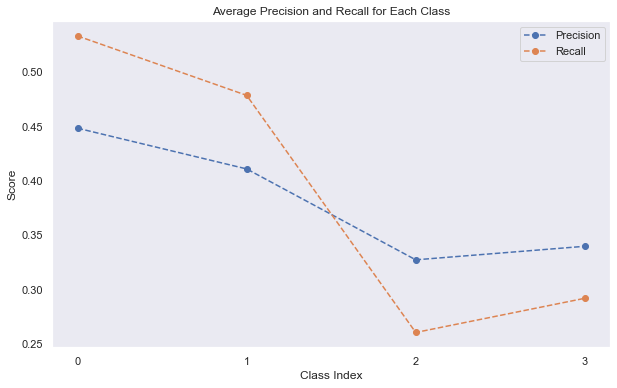

In [143]:
# Move to VIZ AREA and ADD VIZ TO OTHER MODELS 
# 
# 
# IFFY but it works -- you can add 
# 
# Calculate average precision and recall across all folds for each class
average_precision = np.mean(precision_scores, axis=0)
average_recall = np.mean(recall_scores, axis=0)

# Number of classes
num_classes = len(average_precision)

# Plot the precision and recall for each class
plt.figure(figsize=(10, 6))
plt.plot(range(num_classes), average_precision, marker='o', label='Precision', linestyle='--')
plt.plot(range(num_classes), average_recall, marker='o', label='Recall', linestyle='--')

# Customize the plot
plt.xlabel('Class Index')
plt.ylabel('Score')
plt.title('Average Precision and Recall for Each Class')
plt.xticks(range(num_classes))
plt.legend()
plt.grid()

# Show the plot
plt.show()

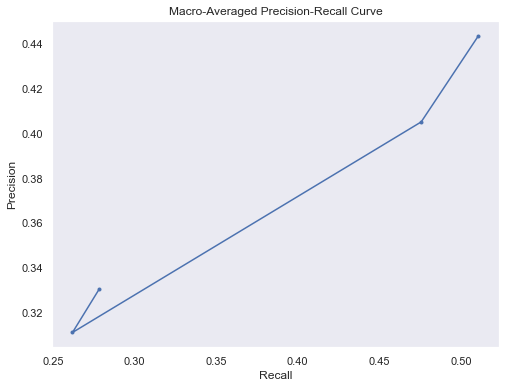

In [141]:
# very iffy 
import matplotlib.pyplot as plt

# Continue with the code to plot the macro-averaged precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged Precision-Recall Curve')
plt.grid()
plt.show()



In [ ]:
# 36 Matt's Version 


# # Evaluate the model on the test set IT STOPS working here on score
# score = rf.score(X_test1, y_test1)
# print(f"  Test score: {score}")

In [278]:
# 37 

# Sanity Check the shape of the data 

# import numpy as np  # Assuming you are using NumPy for your data
# import numpy as np

# # Convert lists to NumPy arrays
# X_train_q1 = np.array(X_train_q1)
# X_test_q1 = np.array(X_test_q1)
# y_train1 = np.array(y_train1)
# y_test1 = np.array(y_test1)


# # Now you can use the shape attribute
# print("X_train_q1 shape:", X_train_q1.shape)
# print("X_test_q1 shape:", X_test_q1.shape)
# print("y_train1 shape:", y_train1.shape)
# print("y_test1 shape:", y_test1.shape)
# print("y_pred shape:", y_pred.shape)



X_train_q1 shape: (35680, 60)
X_test_q1 shape: (237840,)
y_train1 shape: (35680,)
y_test1 shape: (3964,)
y_pred shape: (7928,)


In [ ]:
# 38 Matt's Version

# Make predictions on the test set for share_quantile_ranges task
# rf_y_pred_q1 = rf.predict(X_test_q1)

In [ ]:
# 39 Matt's Version 

# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
# rf_accuracy_q1 = accuracy_score(y_test1, rf_y_pred_q1)
# rf_precision_q1 = precision_score(y_test1, rf_y_pred_q1, average='macro')
# rf_recall_q1 = recall_score(y_test1, rf_y_pred_q1, average='macro')
# rf_f1_score_q1 = f1_score(y_test1, rf_y_pred_q1, average='macro')

# # Create an array to store the model evaluation metrics
# rf_model_scores_q1 = np.array([rf_accuracy_q1, rf_precision_q1, rf_recall_q1, rf_f1_score_q1])

# # Print the model evaluation metrics
# print('Random Forest on share_quantile_ranges Task')
# print(rf_model_scores_q1)
# print('---------------------------------------------------------')
# print('Random Forest accuracy:', rf_accuracy_q1)
# print('Random Forest precision:', rf_precision_q1)
# print('Random Forest recall:', rf_recall_q1)
# print('Random Forest F1 score:', rf_f1_score_q1)

### Adjust parameters as appropriate to increase generalization performance using our chosen metric F1 Score (indicated by scoring="f1_macro" in the cell below).

### The approach for adjusting parameters was two step process. First we chose two key hyper-parameters and performed a Random Grid Search. Using the best parameters of the Random Grid Search we were able to scope the hyper-parameters and tune the mode on a regular Grid Search to determine the best values. Because of the computational time we use a parallel backend use the n_jobs parameter. 

In [304]:
# 40 Tim's Version 

# Step 1 get the randomized grid search to scope the most important hyper parameter values 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from joblib import Parallel, delayed

###################################################################
# Define the parameter grid to search over

# RUN for final scores 
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'min_samples_split': [2, 5, 10]
# }

# Run for testing purposes only 
param_grid = {
    'n_estimators': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

##################################################################


#reduced to run faster - chose f1-score average as scorer 
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, scoring='f1_macro')
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, scoring='f1_macro', n_jobs=-1)


random_search.fit(X_train1, y_train1)
# Get the results of the random search
results = random_search.cv_results_


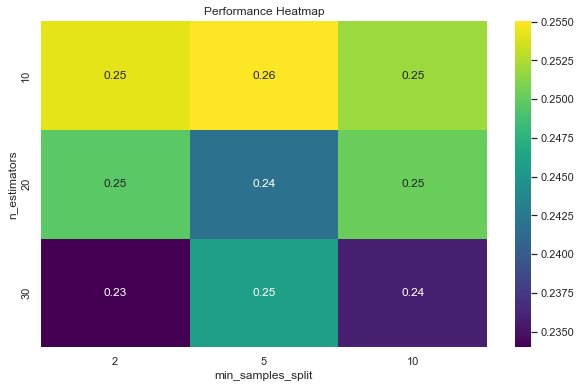

In [305]:
# 41 Tim's Version

# Heat Map RF 1 
# Comparing a parameters RANDOM GRID SEARCH HEAT MAP

#import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already run RandomizedSearchCV and have 'results' available

# Extract the scores and corresponding hyperparameters
scores = results['mean_test_score']
n_estimators_values = [params['n_estimators'] for params in results['params']]
min_samples_split_values = [params['min_samples_split'] for params in results['params']]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame({'n_estimators': n_estimators_values, 'min_samples_split': min_samples_split_values, 'Score': scores})

# Pivot the DataFrame to create a 2D grid
heatmap_data = df.pivot_table(index='n_estimators', columns='min_samples_split', values='Score', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.xlabel('min_samples_split')
plt.ylabel('n_estimators')
plt.title('Performance Heatmap')
plt.show()



### Heat Map of mean cross-validation score as a function of n_estimators and min_samples_split 

In [306]:
# 43 Tim's Version  VIZ -- Duplicate To the right section 

# Calculate the score on the test set using the best estimator
best_model_rf = random_search.best_estimator_
best_model_test_set_score = best_model_rf.score(X_test_q1, y_test1)
print("Best model score for the RF model on the test set: {:.2f}".format(best_model_test_set_score))

# The mean accuracy or best CV accuracy over the different splits for this parameter setting
best_CV_score_rf = random_search.best_score_
print("Best CV F1  score for the RF model: {:.2f}".format(best_CV_score_rf))

# Accessing the best parameters that were found
best_params_rf_model = random_search.best_params_
print("Best parameters: {}".format(best_params_rf_model))

# Accessing the model with the best parameters trained on the whole training set
print("Best Estimator: \n{}".format(best_model_rf))

Best model score for the RF model on the test set: 0.28
Best CV F1  score for the RF model: 0.26
Best parameters: {'n_estimators': 10, 'min_samples_split': 5}
Best Estimator: 
RandomForestClassifier(min_samples_split=5, n_estimators=10)


#### For the Grid Search we take the best hyper-parameter values generated by the random grid search and double their values to do a search within that range to further tune the model.

In [307]:
# 44 Tim's Version 

from sklearn.model_selection import GridSearchCV
# ignore warnings 
import warnings
# To ignore all warnings (not recommended for debugging):
warnings.filterwarnings("ignore")
# To ignore a specific type of warning, e.g., DeprecationWarning:
warnings.filterwarnings("ignore", category=DeprecationWarning)

#based off the best params you woud then run a grid search based off the best params_
from sklearn.model_selection import GridSearchCV
# Extract the best parameters from the random search
best_random_params = random_search.best_params_


###############################################################
# YOU MUST CHANGE THE VALUE BASED OFF THE BEST PARAMETER FOR THAT HYPERPARAMETER 
param_grid_grid_search = {
    'n_estimators': [90, 100, 140],
    'min_samples_split': [3, 5, 25]
}
#######################################################################################

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_grid_search, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train1, y_train1)

# Get the results of the grid search
grid_search_results = grid_search.cv_results_

# Evaluate the model's performance using the test set
best_model_rf_grid_search = grid_search.best_estimator_
best_model_test_set_score_grid_search = best_model_rf_grid_search.score(X_test_q1, y_test1)
print("Best model score for the RF model on the test set (Grid Search): {:.2f}".format(best_model_test_set_score_grid_search))

# Accessing the best parameters that were found
best_params_rf_model = grid_search.best_params_
print("Best parameters: {}".format(best_params_rf_model))



Best model score for the RF model on the test set (Grid Search): 0.27
Best parameters: {'min_samples_split': 5, 'n_estimators': 90}


In [ ]:
# 45 Matt's Version 
# 
# Make predictions on the test set for share_quantile_ranges task
# rf_y_pred_q1 = rf.predict(X_test_q1)

##### Task 2: day_of_week

In [ ]:
# 46 Matt's Version 
# 
# Train the day_of_week task
rf.fit(X_train_q2, y_train2)

In [ ]:
# 47 Matt's Version 
# 
# 
# Make predictions on the test set for day_of_week task
rf_y_pred_q2 = rf.predict(X_test_q2)

In [ ]:
# 48 Matt's Version 
# 
# 
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for day_of_week task.
# rf_accuracy_q2 = accuracy_score(y_test2, rf_y_pred_q2)
# rf_precision_q2 = precision_score(y_test2, rf_y_pred_q2, average='macro')
# rf_recall_q2 = recall_score(y_test2, rf_y_pred_q2, average='macro')
# rf_f1_score_q2 = f1_score(y_test2, rf_y_pred_q2, average='macro')

# # Create an array to store the model evaluation metrics
# rf_model_scores_q2 = np.array([rf_accuracy_q2, rf_precision_q2, rf_recall_q2, rf_f1_score_q2])

# # Print the model evaluation metrics
# print('Random Forest on day_of_week Task')
# print(rf_model_scores_q2)
# print('---------------------------------------------------------')
# print('Random Forest accuracy:', rf_accuracy_q2)
# print('Random Forest precision:', rf_precision_q2)
# print('Random Forest recall:', rf_recall_q2)
# print('Random Forest F1 score:', rf_f1_score_q2)

In [308]:
# 49 Tim's Version 

from sklearn.model_selection import StratifiedKFold

random_state = 42

# Create a StratifiedKFold object with n_splits=10
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = random_state)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = random_state)

# Remove target, related variables, and factor other targets due to them being categorical
X0 = pd.get_dummies(df1, columns=['news_category'])
X2 = X0.drop(['share_quantile_ranges', 'day_of_week'], axis=1) # Removing target categorical variable and other categorical variables
y2 = X0.loc[:,'day_of_week']

# Instantiate transformers
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
scaler = StandardScaler()

f1_scores2 = []
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []

# precision_scores, recall_scores = [], []  # Initialize lists to store precision and recall

X_train_list2, X_test_list2, y_train_list2, y_test_list2 = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X2, y2)):
    print(f"Fold {0}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

    X_train2 = np.array(X2.iloc[train_index].to_numpy())
    X_test2 = np.array(X2.iloc[test_index].to_numpy())
    y_train2 = np.array(y2.iloc[train_index].to_numpy())
    y_test2 = np.array(y2.iloc[test_index].to_numpy())

    # Scale and Quantile Transform for this fold
    # X_train_fold = quantile_transformer.fit_transform(X_train_fold)
    # X_test_fold = quantile_transformer.transform(X_test_fold)
    X_train_fold2 = scaler.fit_transform(X_train2)
    X_test_fold2 = scaler.transform(X_test2)
    X_train_q2 = quantile_transformer.fit_transform(X_train_fold2)
    X_test_q2 = quantile_transformer.transform(X_test_fold2)

    # Instantiate and fit the model (e.g., RandomForestClassifier)
    rf = RandomForestClassifier(n_estimators=100)
    # rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_q2, y_train2)

    # Make predictions on the test set
    rf_y_pred_q2 = rf.predict(X_test_q2)


    # Calculate accuracy and F1 score for this fold
    accuracy = accuracy_score(y_test2, rf_y_pred_q2)
    # f1 = f1_score(y_test1, rf_y_pred_q1)
    f1 = f1_score(y_test2, rf_y_pred_q2, average='macro')
    precision = precision_score(y_test2, rf_y_pred_q2, average=None)
    recall = recall_score(y_test2, rf_y_pred_q2, average= None)

    accuracy_scores2.append(accuracy)
    f1_scores2.append(f1)
    precision_scores2.append(precision)
    recall_scores2.append(recall)
    
    X_train_list2.append(X_train2)
    X_test_list2.append(X_test2)
    y_train_list2.append(y_train2)
    y_test_list2.append(y_test2)

Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    7    16    37 ... 39623 39632 39636]
Fold 0:
  Train: index=[    0     1     3 ... 39640 39642 39643]
  Test:  index=[    2    12    18 ... 39630 39631 39641]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   19    22    62 ... 39565 39586 39619]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   61    64    72 ... 39624 39634 39640]
Fold 0:
  Train: index=[    0     2     4 ... 39641 39642 39643]
  Test:  index=[    1     3     8 ... 39626 39627 39633]
Fold 0:
  Train: index=[    0     1     2 ... 39640 39641 39642]
  Test:  index=[   21    44    47 ... 39600 39628 39643]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   14    28    34 ... 39625 39635 39637]
Fold 0:
  Train: index=[    1     2     3 ... 39641 39642 39643]
  Test:  index=[    0    10    11 ... 39605 39618 39639]
Fold 0:
  Train: index=[

In [184]:
# Pickle Results 2 

import pickle

# Create a dictionary to store all the data
data_to_save = {
    'X_train_list2': X_train_list2,
    'X_test_list2': X_test_list2,
    'y_train_list2': y_train_list2,
    'y_test_list2': y_test_list2,
    'accuracy_scores2': accuracy_scores2,
    'f1_scores2': f1_scores2,
    'precision_scores2': precision_scores2,
    'recall_scores2': recall_scores2
}

# Save the data to a file
with open('data_and_scores_rf2.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)



# # Pickle Results Load 1: 

import pickle

# Load the lists and scores from the file
with open('data_and_scores_rf2.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

X_train_list2 = loaded_data['X_train_list2']
X_test_list2 = loaded_data['X_test_list2']
y_train_list2 = loaded_data['y_train_list2']
y_test_list2 = loaded_data['y_test_list2']
accuracy_scores2 = loaded_data['accuracy_scores2']
f1_scores2 = loaded_data['f1_scores2']
precision_scores2 = loaded_data['precision_scores2']
recall_scores2 = loaded_data['recall_scores2']

# print(recall_scores)


In [309]:
# 50 Tim's Version 

import numpy as np

rf_accuracy_q2 = accuracy_score(y_test2, rf_y_pred_q2)
rf_precision_q2 = precision_score(y_test2, rf_y_pred_q2, average='macro')
rf_recall_q2 = recall_score(y_test2, rf_y_pred_q2, average='macro')
rf_f1_score_q2 = f1_score(y_test2, rf_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q2 = np.array([rf_accuracy_q2, rf_precision_q2, rf_recall_q2, rf_f1_score_q2])

# Print the model evaluation metrics
print('Random Forest on Task 2: day_of_week')
print(rf_model_scores_q2)
print('---------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q2)
print('Random Forest precision:', rf_precision_q2)
print('Random Forest recall:', rf_recall_q2)
print('Random Forest F1 score:', rf_f1_score_q2)



Random Forest on Task 2: day_of_week
[0.28657921 0.33733766 0.33267144 0.33157025]
---------------------------------------------
Random Forest accuracy: 0.2865792129162462
Random Forest precision: 0.33733765938904015
Random Forest recall: 0.3326714387186743
Random Forest F1 score: 0.3315702463018108


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [310]:
# 51 Tim's Version 
 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Identify the most important hyperparameters
# Define the parameter grid to search 
###################################################################
# Define the parameter grid to search over

# RUN for final scores 
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'min_samples_split': [2, 5, 10]
# }

# Run for testing purposes only 
param_grid = {
    'n_estimators': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

##################################################################
#reduced to run faster - chose f1-score average as scorer 
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, scoring='f1_macro', n_jobs=-1)


random_search.fit(X_train2, y_train2)
# Get the results of the random search
results2 = random_search.cv_results_



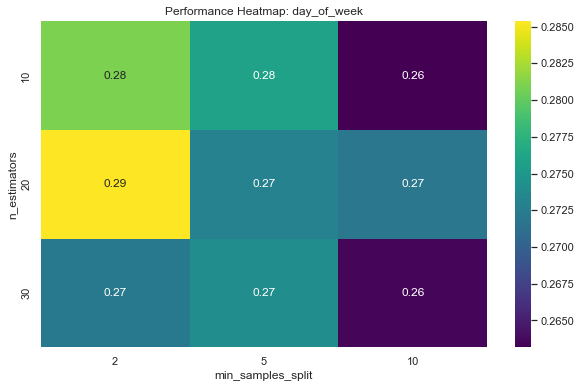

In [312]:
# 52 Tim's Version 

# Tim's Version Heat Map RF  2 day of week 

#import seaborn as sns
import matplotlib.pyplot as plt

# Extract the scores and corresponding hyperparameters
scores = results2['mean_test_score']
n_estimators_values = [params['n_estimators'] for params in results2['params']]
min_samples_split_values = [params['min_samples_split'] for params in results2['params']]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame({'n_estimators': n_estimators_values, 'min_samples_split': min_samples_split_values, 'Score': scores})

# Pivot the DataFrame to create a 2D grid
heatmap_data = df.pivot_table(index='n_estimators', columns='min_samples_split', values='Score', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.xlabel('min_samples_split')
plt.ylabel('n_estimators')
plt.title('Performance Heatmap: day_of_week')
plt.show()


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [313]:
# 53 Tim's Version 

# Calculate the score on the test set using the best estimator
best_model_rf = random_search.best_estimator_
best_model_test_set_score = best_model_rf.score(X_test_q2, y_test2)
print("Best model score for the RF model on the test set: {:.2f}".format(best_model_test_set_score))

# The mean accuracy or best CV accuracy over the different splits for this parameter setting
best_CV_score_rf = random_search.best_score_
print("Best CV F1  score for the RF model: {:.2f}".format(best_CV_score_rf))

# Accessing the best parameters that were found
best_params_rf_model = random_search.best_params_
print("Best parameters: {}".format(best_params_rf_model))

# Accessing the model with the best parameters trained on the whole training set
print("Best Estimator: \n{}".format(best_model_rf))

Best model score for the RF model on the test set: 0.17
Best CV F1  score for the RF model: 0.29
Best parameters: {'n_estimators': 20, 'min_samples_split': 2}
Best Estimator: 
RandomForestClassifier(n_estimators=20)


In [315]:
# 54 Tim's Version 

from sklearn.model_selection import GridSearchCV

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")
# To ignore a specific type of warning, e.g., DeprecationWarning:
warnings.filterwarnings("ignore", category=DeprecationWarning)

#based off the best params you woud then run a grid search based off the best params_
from sklearn.model_selection import GridSearchCV

# Extract the best parameters from the random search
best_random_params = random_search.best_params_


###############################################################
# YOU MUST CHANGE THE VALUE BASED OFF THE BEST PARAMETER FOR THAT HYPERPARAMETER 
param_grid_grid_search = {
    'n_estimators': [90, 100, 140],
    'min_samples_split': [2, 5, 25]
}
#######################################################################################

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_grid_search, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train2, y_train2)

# Get the results of the grid search
grid_search_results = grid_search.cv_results_

# Evaluate the model's performance using the test set
best_model_rf_grid_search = grid_search.best_estimator_
best_model_test_set_score_grid_search = best_model_rf_grid_search.score(X_test_q2, y_test2)

print("Best model score for the RF model on the test set (Grid Search): {:.2f}".format(best_model_test_set_score_grid_search))

# Accessing the best parameters that were found
best_params_rf_model = grid_search.best_params_
print("Best parameters: {}".format(best_params_rf_model))



Best model score for the RF model on the test set (Grid Search): 0.17
Best parameters: {'min_samples_split': 2, 'n_estimators': 90}


________________
<a href="#top">Back to Top</a>
<a id="KNNmodel"></a>
#### KNN

##### Task 1: share_quantile_ranges

In [316]:
# 55 Tim's Version 

from sklearn.model_selection import StratifiedKFold

random_state = 42

# Create a StratifiedKFold object with n_splits=10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = random_state)

# Remove target, related variables, and factor other targets due to them being categorical
import numpy as np
X0 = pd.get_dummies(df1, columns=['day_of_week'])
X0 = pd.get_dummies(X0, columns=['news_category'])
X1 = X0.drop(['share_quantile_ranges', 'shares'], axis=1) 
y1 = X0.loc[:,'share_quantile_ranges']


# Instantiate transformers
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
scaler = StandardScaler()

f1_scores_knn_q1 = []
accuracy_scores_knn_q1 = []
precision_scores_knn_q1 = []
recall_scores_knn_q1 = []

# precision_scores, recall_scores = [], []  # Initialize lists to store precision and recall

X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X1, y1)):
    print(f"Fold {0}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

    X_train1 = np.array(X1.iloc[train_index].to_numpy())
    X_test1 = np.array(X1.iloc[test_index].to_numpy())
    y_train1 = np.array(y1.iloc[train_index].to_numpy())
    y_test1 = np.array(y1.iloc[test_index].to_numpy())

    # Scale and Quantile Transform for this fold
    # X_train_fold = quantile_transformer.fit_transform(X_train_fold)
    # X_test_fold = quantile_transformer.transform(X_test_fold)
    X_train_fold = scaler.fit_transform(X_train1)
    X_test_fold = scaler.transform(X_test1)
    X_train_q1 = quantile_transformer.fit_transform(X_train_fold)
    X_test_q1 = quantile_transformer.transform(X_test_fold)

    # Instantiate KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_q1, y_train1)

    # Make predictions on the test set
    knn_y_pred_q1 = knn.predict(X_test_q1)
    
    # Calculate accuracy and F1 score for this fold
    knn_accuracy_q1 = accuracy_score(y_test1, knn_y_pred_q1)
    # f1 = f1_score(y_test1, rf_y_pred_q1)
    knn_f1_score_q1 = f1_score(y_test1, knn_y_pred_q1, average='macro')
    knn_precision_q1 = precision_score(y_test1, knn_y_pred_q1, average=None)
    knn_recall_q1 = recall_score(y_test1, knn_y_pred_q1, average= None)

    accuracy_scores.append(knn_accuracy_q1)
    f1_scores.append(knn_f1_score_q1)
    precision_scores.append(knn_precision_q1)
    recall_scores.append(knn_recall_q1)
    
    X_train_list.append(X_train1)
    X_test_list.append(X_test1)
    y_train_list.append(y_train1)
    y_test_list.append(y_test1)

Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    9    19    23 ... 39630 39636 39639]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   26    27    29 ... 39570 39592 39621]
Fold 0:
  Train: index=[    1     2     3 ... 39641 39642 39643]
  Test:  index=[    0     5    16 ... 39593 39600 39615]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    4    10    11 ... 39574 39614 39638]
Fold 0:
  Train: index=[    0     3     4 ... 39641 39642 39643]
  Test:  index=[    1     2     6 ... 39589 39596 39611]
Fold 0:
  Train: index=[    0     1     2 ... 39639 39640 39642]
  Test:  index=[   33    42    49 ... 39637 39641 39643]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    3    15    31 ... 39584 39608 39635]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    7    20    57 ... 39633 39634 39640]
Fold 0:
  Train: index=[

In [317]:
# 56 Tim's Version 

# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
knn_accuracy_q1 = accuracy_score(y_test1, knn_y_pred_q1)
knn_precision_q1 = precision_score(y_test1, knn_y_pred_q1, average='macro')
knn_recall_q1 = recall_score(y_test1, knn_y_pred_q1, average='macro')
knn_f1_score_q1 = f1_score(y_test1, knn_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
knn_model_scores_q1 = np.array([knn_accuracy_q1, knn_precision_q1, knn_recall_q1, knn_f1_score_q1])
print('KNN on share_quantile_ranges Task')
print(knn_model_scores_q1)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q1)
print('KNN precision:', knn_precision_q1)
print('KNN recall:', knn_recall_q1)
print('KNN F1 score:', knn_f1_score_q1)

KNN on share_quantile_ranges Task
[0.32870838 0.32359307 0.32918026 0.32117773]
---------------------------------------------------------
KNN accuracy: 0.32870837537840564
KNN precision: 0.323593071659247
KNN recall: 0.32918025660927225
KNN F1 score: 0.3211777324319068


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [319]:
# 57 Tim's Version 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

######################################################
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors (uniform or distance-based)
    'p': [1, 2],  # Power parameter for the Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}
######################################################

# Perform the randomized search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_grid, n_iter=100, cv=5, scoring='f1_macro', n_jobs=-1)

random_search_knn.fit(X_train1, y_train1)
# Get the results of the random search
results_knn1 = random_search_knn.cv_results_

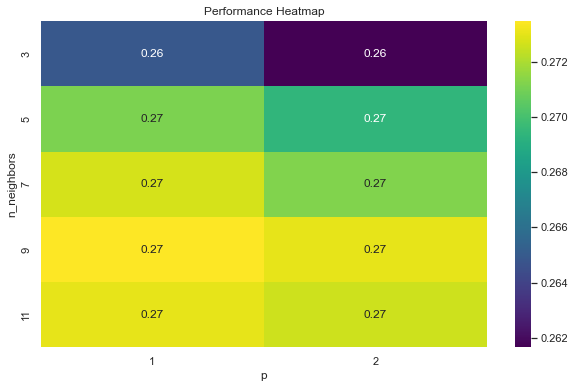

Best model score for the KNN model on the test set: 0.25
Best CV F1 score for the KNN model: 0.27
Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 11}
Best Estimator: 
KNeighborsClassifier(n_neighbors=11, weights='distance')


In [320]:
# 58 Tim's Version 

import seaborn as sns
import matplotlib.pyplot as plt

# Extract the scores and corresponding hyperparameters
scores = results_knn1['mean_test_score']
n_neighbors = [params['n_neighbors'] for params in results_knn1['params']]
p = [params['p'] for params in results_knn1['params']]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame({'n_neighbors': n_neighbors, 'p': p, 'Score': scores})

# Pivot the DataFrame to create a 2D grid
heatmap_data = df.pivot_table(index='n_neighbors', columns='p', values='Score', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.xlabel('p')
plt.ylabel('n_neighbors')
plt.title('Performance Heatmap')
plt.show()



# Calculate the score on the test set using the best estimator
best_model_knn1 = random_search_knn.best_estimator_
best_model_test_set_score_knn = best_model_knn1.score(X_test_q1, y_test1)
print("Best model score for the KNN model on the test set: {:.2f}".format(best_model_test_set_score_knn))

# The mean accuracy or best CV accuracy over the different splits for this parameter setting
best_CV_score_knn1 = random_search_knn.best_score_
print("Best CV score for the KNN model: {:.2f}".format(best_F1_score_knn1))



# Accessing the best parameters that were found
best_params_knn1_model = random_search_knn.best_params_
print("Best parameters: {}".format(best_params_knn1_model))

# Accessing the model with the best parameters trained on the whole training set
print("Best Estimator: \n{}".format(best_model_knn1))

In [322]:
# 59 Tim's Version 

from sklearn.model_selection import GridSearchCV
# ignore warnings 
import warnings
warnings.filterwarnings("ignore")
# To ignore a specific type of warning, e.g., DeprecationWarning:
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import GridSearchCV

# Extract the best parameters from the random search
best_params_knn1_model = random_search_knn.best_params_

####################################################################
# Define a new parameter grid for the grid search
knn_param_grid = {
    'n_neighbors': [11, 13, 15, 17],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors (uniform or distance-based)
    'p': [1, 2],  # Power parameter for the Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}
####################################################################

# Create a GridSearchCV object
grid_search_knn1 = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
grid_search_knn1.fit(X_train1, y_train1)

# Get the results of the grid search
grid_search_results_knn1 = grid_search_knn1.cv_results_

# Evaluate the model's performance using the test set
best_model_knn1_grid_search = grid_search_knn1.best_estimator_
best_model_test_set_score_grid_search_knn1 = best_model_knn1_grid_search.score(X_test_q1, y_test1)
print("Best model score for the KNN model on the test set (Grid Search): {:.2f}".format(best_model_test_set_score_grid_search_knn1))

# Accessing the best parameters that were found
best_params_knn1_model = grid_search_knn1.best_params_
print("Best parameters: {}".format(best_params_knn1_model))



/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn

Best model score for the KNN model on the test set (Grid Search): 0.25
Best parameters: {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [ ]:
# 60 Matt's Version 


# Create the KNN model
# knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# 61 Matt's Version 
# 
# Train the model for the share_quantile_ranges task.
# knn.fit(X_train_q1, y_train1)

In [ ]:
# 62 Matt's Version 


# Make predictions on the test set for the share_quantile_ranges task.
# knn_y_pred_q1 = knn.predict(X_test_q1)

In [ ]:
# 63 Matt's Version 


# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
# knn_accuracy_q1 = accuracy_score(y_test1, knn_y_pred_q1)
# knn_precision_q1 = precision_score(y_test1, knn_y_pred_q1, average='macro')
# knn_recall_q1 = recall_score(y_test1, knn_y_pred_q1, average='macro')
# knn_f1_score_q1 = f1_score(y_test1, knn_y_pred_q1, average='macro')

# # Create an array to store the model evaluation metrics for the share_quantile_ranges task.
# knn_model_scores_q1 = np.array([knn_accuracy_q1, knn_precision_q1, knn_recall_q1, knn_f1_score_q1])
# print('KNN on share_quantile_ranges Task')
# print(knn_model_scores_q1)
# print('---------------------------------------------------------')
# print('KNN accuracy:', knn_accuracy_q1)
# print('KNN precision:', knn_precision_q1)
# print('KNN recall:', knn_recall_q1)
# print('KNN F1 score:', knn_f1_score_q1)

##### Task 2: day_of_week

In [323]:
# 64 Tim's Version 

from sklearn.model_selection import StratifiedKFold

random_state = 42

# Create a StratifiedKFold object with n_splits=10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = random_state)

# Remove target, related variables, and factor other targets due to them being categorical
X0 = pd.get_dummies(df1, columns=['news_category'])
X2 = X0.drop(['share_quantile_ranges', 'day_of_week'], axis=1) # Removing target categorical variable and other categorical variables
y2 = X0.loc[:,'day_of_week']

# Instantiate transformers
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
scaler = StandardScaler()

f1_scores2 = []
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []

# precision_scores, recall_scores = [], []  # Initialize lists to store precision and recall

X_train_list2, X_test_list2, y_train_list2, y_test_list2 = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X2, y2)):
    print(f"Fold {0}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

    X_train2 = np.array(X2.iloc[train_index].to_numpy())
    X_test2 = np.array(X2.iloc[test_index].to_numpy())
    y_train2 = np.array(y2.iloc[train_index].to_numpy())
    y_test2 = np.array(y2.iloc[test_index].to_numpy())

    # Scale and Quantile Transform for this fold
    # X_train_fold = quantile_transformer.fit_transform(X_train_fold)
    # X_test_fold = quantile_transformer.transform(X_test_fold)
    X_train_fold2 = scaler.fit_transform(X_train2)
    X_test_fold2 = scaler.transform(X_test2)
    X_train_q2 = quantile_transformer.fit_transform(X_train_fold2)
    X_test_q2 = quantile_transformer.transform(X_test_fold2)


    # Instantiate KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_q2, y_train2)

    # Make predictions on the test set
    knn_y_pred_q2 = knn.predict(X_test_q2)
    
    # Calculate accuracy and F1 score for this fold
    knn_accuracy_q2 = accuracy_score(y_test2, knn_y_pred_q2)
    knn_f1_score_q2 = f1_score(y_test2, knn_y_pred_q2, average='macro')
    knn_precision_q2 = precision_score(y_test2, knn_y_pred_q2, average=None)
    knn_recall_q2 = recall_score(y_test2, knn_y_pred_q2, average= None)

    accuracy_scores2.append(knn_accuracy_q2)
    f1_scores2.append(knn_f1_score_q2)
    precision_scores2.append(knn_precision_q2)
    recall_scores2.append(knn_recall_q2)
    
    X_train_list2.append(X_train2)
    X_test_list2.append(X_test2)
    y_train_list2.append(y_train2)
    y_test_list2.append(y_test2)

Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    7    16    37 ... 39623 39632 39636]
Fold 0:
  Train: index=[    0     1     3 ... 39640 39642 39643]
  Test:  index=[    2    12    18 ... 39630 39631 39641]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   19    22    62 ... 39565 39586 39619]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   61    64    72 ... 39624 39634 39640]
Fold 0:
  Train: index=[    0     2     4 ... 39641 39642 39643]
  Test:  index=[    1     3     8 ... 39626 39627 39633]
Fold 0:
  Train: index=[    0     1     2 ... 39640 39641 39642]
  Test:  index=[   21    44    47 ... 39600 39628 39643]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[   14    28    34 ... 39625 39635 39637]
Fold 0:
  Train: index=[    1     2     3 ... 39641 39642 39643]
  Test:  index=[    0    10    11 ... 39605 39618 39639]
Fold 0:
  Train: index=[

In [324]:
# 65 Tim's Version 

# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
knn_accuracy_q2 = accuracy_score(y_test2, knn_y_pred_q2)
knn_precision_q2 = precision_score(y_test2, knn_y_pred_q2, average='macro')
knn_recall_q2 = recall_score(y_test2, knn_y_pred_q2, average='macro')
knn_f1_score_q2 = f1_score(y_test2, knn_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
knn_model_scores_q2 = np.array([knn_accuracy_q2, knn_precision_q2, knn_recall_q2, knn_f1_score_q2])
print('KNN on share_quantile_ranges Task')
print(knn_model_scores_q2)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q2)
print('KNN precision:', knn_precision_q2)
print('KNN recall:', knn_recall_q2)
print('KNN F1 score:', knn_f1_score_q2)

KNN on share_quantile_ranges Task
[0.25302725 0.30743114 0.30751924 0.30563799]
---------------------------------------------------------
KNN accuracy: 0.25302724520686176
KNN precision: 0.30743113622130064
KNN recall: 0.30751923863040675
KNN F1 score: 0.3056379904637822


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [325]:
# 66 Tim's Version 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score


######################################################
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors (uniform or distance-based)
    'p': [1, 2],  # Power parameter for the Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}
######################################################

# Perform the randomized search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_grid, n_iter=100, cv=5, scoring='f1_macro', n_jobs=-1)

random_search_knn2.fit(X_train2, y_train2)
# Get the results of the random search
results_knn2 = random_search_knn2.cv_results_


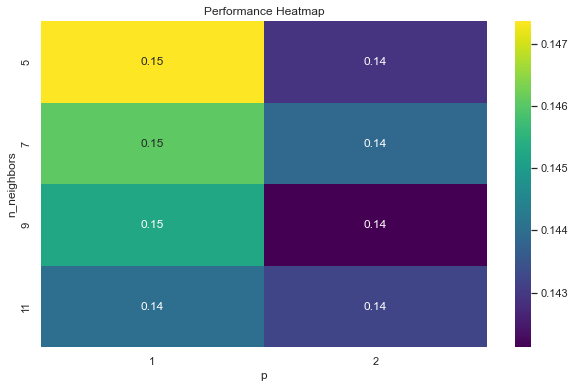

In [326]:
# 67 Tim's Version -- duplicate viz into the appropriate section 

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already run RandomizedSearchCV and have 'results' available

# Extract the scores and corresponding hyperparameters
scores = results_knn2['mean_test_score']
n_neighbors = [params['n_neighbors'] for params in results_knn2['params']]
p = [params['p'] for params in results_knn2['params']]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame({'n_neighbors': n_neighbors, 'p': p, 'Score': scores})

# Pivot the DataFrame to create a 2D grid
heatmap_data = df.pivot_table(index='n_neighbors', columns='p', values='Score', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.xlabel('p')
plt.ylabel('n_neighbors')
plt.title('Performance Heatmap')
plt.show()


In [327]:
# 68 Tim's Version 

# Calculate the score on the test set using the best estimator
best_model_knn2 = random_search_knn2.best_estimator_
best_model_test_set_score_knn2 = best_model_knn2.score(X_test_q2, y_test2)
print("Best model score for the KNN model on the test set: {:.2f}".format(best_model_test_set_score_knn2))

# The mean accuracy or best CV accuracy over the different splits for this parameter setting
best_CV_score_knn2 = random_search_knn2.best_score_
print("Best CV F1 score for the KNN model: {:.2f}".format(best_CV_score_knn2))



# Accessing the best parameters that were found
best_params_knn2_model = random_search_knn2.best_params_
print("Best parameters: {}".format(best_params_knn2_model))

# Accessing the model with the best parameters trained on the whole training set
print("Best Estimator: \n{}".format(best_model_knn2))

Best model score for the KNN model on the test set: 0.17
Best CV F1 score for the KNN model: 0.15
Best parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5}
Best Estimator: 
KNeighborsClassifier(p=1, weights='distance')


### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [328]:
# 69 Tim's Version 

from sklearn.model_selection import GridSearchCV

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")
# To ignore a specific type of warning, e.g., DeprecationWarning:
warnings.filterwarnings("ignore", category=DeprecationWarning)

#based off the best params you woud then run a grid search based off the best params_
from sklearn.model_selection import GridSearchCV

# Extract the best parameters from the random search
best_params_knn2_model = random_search_knn2.best_params_

####################################################################
# Define a new parameter grid for the grid search
knn_param_grid = {
    'n_neighbors': [5, 11, 13, 15],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors (uniform or distance-based)
    'p': [1, 2],  # Power parameter for the Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}
####################################################################

# Create a GridSearchCV object
grid_search_knn1 = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
grid_search_knn2.fit(X_train2, y_train2)

# Get the results of the grid search
grid_search_results_knn2 = grid_search_knn2.cv_results_

# Evaluate the model's performance using the test set
best_model_knn2_grid_search = grid_search_knn2.best_estimator_
best_model_test_set_score_grid_search_knn2 = best_model_knn2_grid_search.score(X_test_q2, y_test2)
print("Best model score for the RF model on the test set (Grid Search): {:.2f}".format(best_model_test_set_score_grid_search_knn2))

# Accessing the best parameters that were found
best_params_knn2_model = grid_search_knn2.best_params_
print("Best parameters: {}".format(best_params_knn2_model))



Best model score for the RF model on the test set (Grid Search): 0.17
Best parameters: {'n_neighbors': 11, 'p': 2}


In [ ]:
# 70 Matt's Version 

# Train the model for the day_of_week task.
# knn.fit(X_train_q2, y_train2)

In [ ]:
# 71 Matt's Version 

# Make predictions on the test set for the day_of_week task.
# knn_y_pred_q2 = knn.predict(X_test_q2)

In [ ]:
# 72 Matt's Version 

# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
# knn_accuracy_q2 = accuracy_score(y_test2, knn_y_pred_q2)
# knn_precision_q2 = precision_score(y_test2, knn_y_pred_q2, average='macro')
# knn_recall_q2 = recall_score(y_test2, knn_y_pred_q2, average='macro')
# knn_f1_score_q2 = f1_score(y_test2, knn_y_pred_q2, average='macro')

# # Create an array to store the model evaluation metrics the day_of_week task.
# knn_model_scores_q2 = np.array([knn_accuracy_q2, knn_precision_q2, knn_recall_q2, knn_f1_score_q2])
# print('KNN on day_of_week Task')
# print(knn_model_scores_q2)
# print('---------------------------------------------------------')
# print('KNN accuracy:', knn_accuracy_q2)
# print('KNN precision:', knn_precision_q2)
# print('KNN recall:', knn_recall_q2)
# print('KNN F1 score:', knn_f1_score_q2)

________________
<a href="#top">Back to Top</a>
<a id="SVMmodel"></a>
#### SVM 

##### Task 1: share_quantile_ranges

In [252]:
# 73  Tim's Version 

from sklearn.model_selection import StratifiedKFold

random_state = 42

# Create a StratifiedKFold object with n_splits=10
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = random_state)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = random_state)

# Remove target, related variables, and factor other targets due to them being categorical
import numpy as np
X0 = pd.get_dummies(df1, columns=['day_of_week'])
X0 = pd.get_dummies(X0, columns=['news_category'])
X1 = X0.drop(['share_quantile_ranges', 'shares'], axis=1) 
y1 = X0.loc[:,'share_quantile_ranges']


# Instantiate transformers
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
scaler = StandardScaler()

f1_scores_svm_q1 = []
accuracy_scores_svm_q1 = []
precision_scores_svm_q1 = []
recall_scores_svm_q1 = []

# precision_scores, recall_scores = [], []  # Initialize lists to store precision and recall

X_train_list_svm1, X_test_list_svm1, y_train_list_svm1, y_test_list_svm1 = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X1, y1)):
    print(f"Fold {0}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

    X_train1 = np.array(X1.iloc[train_index].to_numpy())
    X_test1 = np.array(X1.iloc[test_index].to_numpy())
    y_train1 = np.array(y1.iloc[train_index].to_numpy())
    y_test1 = np.array(y1.iloc[test_index].to_numpy())

    # Scale and Quantile Transform for this fold
    # X_train_fold = quantile_transformer.fit_transform(X_train_fold)
    # X_test_fold = quantile_transformer.transform(X_test_fold)
    X_train_fold = scaler.fit_transform(X_train1)
    X_test_fold = scaler.transform(X_test1)
    X_train_q1 = quantile_transformer.fit_transform(X_train_fold)
    X_test_q1 = quantile_transformer.transform(X_test_fold)

    # Set the model parameters
    C = 1.0
    kernel = 'linear'

    # Instantiate the support vector machine model
    support_vector_machine_model = SVC(C=C, kernel=kernel)
    support_vector_machine_model.fit(X_train_q1, y_train1)

    # Make predictions on the test set
    svm_y_pred_q1 = support_vector_machine_model.predict(X_test_q1)
    
    # Calculate accuracy and F1 score for this fold
    svm_accuracy_q1 = accuracy_score(y_test1, svm_y_pred_q1)
    # f1 = f1_score(y_test1, rf_y_pred_q1)
    svm_f1_score_q1 = f1_score(y_test1, svm_y_pred_q1, average='macro')
    svm_precision_q1 = precision_score(y_test1, svm_y_pred_q1, average=None)
    svm_recall_q1 = recall_score(y_test1, svm_y_pred_q1, average= None)

    accuracy_scores_svm_q1.append(svm_accuracy_q1)
    f1_scores_svm_q1.append(svm_f1_score_q1)
    precision_scores_svm_q1.append(svm_precision_q1)
    recall_scores_svm_q1.append(svm_recall_q1)
    
    X_train_list_svm1.append(X_train1)
    X_test_list_svm1.append(X_test1)
    y_train_list_svm1.append(y_train1)
    y_test_list_svm1.append(y_test1)
    
    
# time: 83m 48.4s on 5 FOLD     

Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    9    19    23 ... 39630 39636 39639]
Fold 0:
  Train: index=[    1     2     3 ... 39641 39642 39643]
  Test:  index=[    0     4     5 ... 39614 39615 39638]
Fold 0:
  Train: index=[    0     3     4 ... 39639 39640 39642]
  Test:  index=[    1     2     6 ... 39637 39641 39643]
Fold 0:
  Train: index=[    0     1     2 ... 39641 39642 39643]
  Test:  index=[    3     7    15 ... 39634 39635 39640]
Fold 0:
  Train: index=[    0     1     2 ... 39640 39641 39643]
  Test:  index=[   17    18    21 ... 39629 39631 39642]


In [256]:
# # Pickle Results Load 1: 
## Note it took 

import pickle

# Create a dictionary to store all the data
data_and_scores_svm_q1 = {
    'X_train_list_svm1': X_train_list_svm1,
    'X_test_list_svm1': X_test_list_svm1,
    'y_train_list_svm1': y_train_list_svm1,
    'y_test_list_svm1': y_test_list_svm1,
    'accuracy_scores_svm_q1': accuracy_scores_svm_q1,
    'f1_scores_svm_q1': f1_scores_svm_q1,
    'precision_scores_svm_q1': precision_scores_svm_q1,
    'recall_scores_svm_q1': recall_scores_svm_q1
}

# Save the data to a file
with open('data_and_scores_svm_q1.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)


import pickle

# Load the lists and scores from the file
with open('data_and_scores_svm_q1.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

X_train_list_svm1 = loaded_data['X_train_list_svm1']
X_test_list_svm1 = loaded_data['X_test_list_svm1']
y_train_list_svm1 = loaded_data['y_train_list_svm1']
y_test_list_svm1 = loaded_data['y_test_list_svm1']
accuracy_scores_svm_q1 = loaded_data['accuracy_scores_svm_q1']
f1_scores_svm_q1 = loaded_data['f1_scores_svm_q1']
precision_scores_svm_q1 = loaded_data['precision_scores_svm_q1']
recall_scores_svm_q1 = loaded_data['recall_scores_svm_q1']

# print(recall_scores)

In [ ]:
# 74 Tim's Version 

# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
svm_accuracy_q1 = accuracy_score(y_test1, svm_y_pred_q1)
svm_precision_q1 = precision_score(y_test1, svm_y_pred_q1, average='macro')
svm_recall_q1 = recall_score(y_test1, svm_y_pred_q1, average='macro')
svm_f1_score_q1 = f1_score(y_test1, svm_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
svm_model_scores_q1 = np.array([svm_accuracy_q1, svm_precision_q1, svm_recall_q1, svm_f1_score_q1])
print('SVM on share_quantile_ranges Task')
print(svm_model_scores_q1)
print('---------------------------------------------------------')
print('SVM accuracy:', svm_accuracy_q1)
print('SVM precision:', svm_precision_q1)
print('SVM recall:', svm_recall_q1)
print('SVM F1 score:', svm_f1_score_q1)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# 75 Tim's Version

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Identify the most important hyperparameters
# Define the parameter grid to search over
svm = SVC(random_state=42)

##################################################################

# Define a parameter grid for the SVM model
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
}
# param_grid = {
#     'C': [1, 10],
#     'gamma': [0.001, 0.01],
# }
##################################################################

# random_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=100, cv=5, scoring='f1_macro')
random_search_svm1 = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=20, cv=3, scoring='f1_macro', n_jobs=-1)



# Fit the grid search to the training data
random_search_svm1.fit(X_train1, y_train1)

# Get the best model from the grid search
results_svm1 = random_search_svm1.cv_results_



In [ ]:
# Pickle random search param grid 

import pickle

# Save the results as a pickle file
with open('results_svm1.pkl', 'wb') as f:
  pickle.dump(results_svm1, f)
  
import pickle

# Load the results from the pickle file
with open('results_svm1.pkl', 'rb') as f:
  results_svm1 = pickle.load(f)

# Print the best parameters
print(results_svm1['best_params_'])

# Print the best score
print(results_svm1['best_score_'])

In [ ]:
# 78 Tim's Version

# Heat Map SVM share_quantile_ranges
#import seaborn as sns
import matplotlib.pyplot as plt

# Extract the scores and corresponding hyperparameters
scores = results_svm1['mean_test_score']
C = [params['C'] for params in results_svm1['params']]
gamma = [params['gamma'] for params in results_svm1['params']]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame({'gamma': gamma, 'C': C, 'Score': scores})

# Pivot the DataFrame to create a 2D grid
heatmap_data = df.pivot_table(index='gamma', columns='C', values='Score', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Performance Heatmap')
plt.show()


In [ ]:
# 79 Tim's Version 

# Calculate the score on the test set using the best estimator
best_model_svm1 = random_search_svm1.best_estimator_
best_model_test_set_score_svm1 = best_model_svm1.score(X_test_q1, y_test1)
print("Best model score for the KNN model on the test set: {:.2f}".format(best_model_test_set_score_svm1))

# The mean accuracy or best CV accuracy over the different splits for this parameter setting
best_CV_score_svm1 = random_search_svm1.best_score_
print("Best CV F1 score for the KNN model: {:.2f}".format(best_CV_score_svm1))


# Accessing the best parameters that were found
best_params_svm1_model = random_search_svm1.best_params_
print("Best parameters: {}".format(best_params_svm1_model))

# Accessing the model with the best parameters trained on the whole training set
print("Best Estimator: \n{}".format(best_model_svm1))

In [ ]:
# 80 Tim's Version 

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
# To ignore a specific type of warning, e.g., DeprecationWarning:
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Extract the best parameters from the random search
best_params_svm1_model = random_search_svm1.best_params_

####################################################################
param_grid_grid_search_svm1 = {
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
}
####################################################################

# Create a GridSearchCV object
grid_search_svm1 = GridSearchCV(estimator=svm, param_grid=param_grid_grid_search_svm1, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
grid_search_svm1.fit(X_train1, y_train1)

# Get the results of the grid search
grid_search_results_svm1 = grid_search_svm1.cv_results_

# Evaluate the model's performance using the test set
best_model_svm1_grid_search = grid_search_svm1.best_estimator_
best_model_test_set_score_grid_search_svm1 = best_model_svm1_grid_search.score(X_test_q1, y_test1)
print("Best model CV F1 score for the SVM model on the test set (Grid Search): {:.2f}".format(best_model_test_set_score_grid_search_svm1))

# Accessing the best parameters that were found
best_params_svm1_model = grid_search_svm1.best_params_
print("Best parameters: {}".format(best_params_svm1_model))



In [ ]:
# 81 Matt's Version 

# Set the model parameters
# C = 1.0
# kernel = 'linear'

# # Create the support vector machine model
# support_vector_machine_model = SVC(C=C, kernel=kernel)

In [ ]:
# 82 Matt's Version 

# Train the support vector machine model on the training set using a linear kernel for the share_quantile_ranges task.
# support_vector_machine_model.fit(X_train_q1, y_train1)

In [ ]:
# 83 Matt's Version 

# Make predictions on the test data for the share_quantile_ranges task.
# svm_y_pred_q1 = support_vector_machine_model.predict(X_test_q1)

In [ ]:
# 84 Matt's Version 


# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
# svm_accuracy_q1 = accuracy_score(y_test1, svm_y_pred_q1)
# svm_precision_q1 = precision_score(y_test1, svm_y_pred_q1, average='macro')
# svm_recall_q1 = recall_score(y_test1, svm_y_pred_q1, average='macro')
# svm_f1_score_q1 = f1_score(y_test1, svm_y_pred_q1, average='macro')

# # Create an array to store the model evaluation metrics for the share_quantile_ranges task.
# svm_model_scores_q1 = np.array([svm_accuracy_q1, svm_precision_q1, svm_recall_q1, svm_f1_score_q1])
# print('SVM on share_quantile_range Task')
# print(svm_model_scores_q1)
# print('---------------------------------------------------------')
# print('Support vector machine accuracy:', svm_accuracy_q1)
# print('Support vector machine precision:', svm_precision_q1)
# print('Support vector machine recall:', svm_recall_q1)
# print('Support vector machine F1 score:', svm_f1_score_q1)

##### Task 2: day_of_week

In [ ]:
# 85 Tim's Version 

from sklearn.model_selection import StratifiedKFold

random_state = 42

# Create a StratifiedKFold object with n_splits=10
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = random_state)
# kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state = random_state)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = random_state)

# Remove target, related variables, and factor other targets due to them being categorical
X0 = pd.get_dummies(df1, columns=['news_category'])
X2 = X0.drop(['share_quantile_ranges', 'day_of_week'], axis=1) # Removing target categorical variable and other categorical variables
y2 = X0.loc[:,'day_of_week']

# Instantiate transformers
quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')
scaler = StandardScaler()

f1_scores_svm_q2= []
accuracy_scores_svm_q2 = []
precision_scores_svm_q2 = []
recall_scores_svm_q2 = []

# precision_scores, recall_scores = [], []  # Initialize lists to store precision and recall

X_train_list_svm2, X_test_list_svm2, y_train_list_svm2, y_test_list_svm2 = [], [], [], []

for i, (train_index, test_index) in enumerate(kfold.split(X2, y2)):
    print(f"Fold {0}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

    X_train2 = np.array(X2.iloc[train_index].to_numpy())
    X_test2 = np.array(X2.iloc[test_index].to_numpy())
    y_train2 = np.array(y2.iloc[train_index].to_numpy())
    y_test2 = np.array(y2.iloc[test_index].to_numpy())

    # Scale and Quantile Transform for this fold
    # X_train_fold = quantile_transformer.fit_transform(X_train_fold)
    # X_test_fold = quantile_transformer.transform(X_test_fold)
    X_train_fold2 = scaler.fit_transform(X_train2)
    X_test_fold2 = scaler.transform(X_test2)
    X_train_q2 = quantile_transformer.fit_transform(X_train_fold2)
    X_test_q2 = quantile_transformer.transform(X_test_fold2)

    # Set the model parameters
    C = 1.0
    kernel = 'linear'

    # Instantiate the support vector machine model
    support_vector_machine_model_2 = SVC(C=C, kernel=kernel)
    support_vector_machine_model_2.fit(X_train_q2, y_train2)

    # Make predictions on the test set
    svm_y_pred_q2 = support_vector_machine_model_2.predict(X_test_q2)
    
    # Calculate accuracy and F1 score for this fold
    svm_accuracy_q2 = accuracy_score(y_test2, svm_y_pred_q2)
    svm_f1_score_q2 = f1_score(y_test2, svm_y_pred_q2, average='macro')
    svm_precision_q2 = precision_score(y_test2, svm_y_pred_q2, average=None)
    svm_recall_q2 = recall_score(y_test2, svm_y_pred_q2, average= None)

    accuracy_scores_svm_q2.append(svm_accuracy_q2)
    accuracy_scores_svm_q2.append(svm_f1_score_q2)
    precision_scores_svm_q2.append(svm_precision_q2)
    recall_scores_svm_q2.append(svm_recall_q2)
    
    X_train_list_svm2.append(X_train2)
    X_test_list_svm2.append(X_test2)
    y_train_list_svm2.append(y_train2)
    y_test_list_svm2.append(y_test2)

In [ ]:
# # Pickle Results Load 1: 


import pickle

# Create a dictionary to store all the data
data_and_scores_svm_q2 = {
    'X_train_list_svm2': X_train_list_svm2,
    'X_test_list_svm2': X_test_list_svm2,
    'y_train_list_svm2': y_train_list_svm2,
    'y_test_list_svm2': y_test_list_svm2,
    'accuracy_scores_svm_q2': accuracy_scores_svm_q2,
    'f1_scores_svm_q2': f1_scores_svm_q2,
    'precision_scores_svm_q2': precision_scores_svm_q2,
    'recall_scores_svm_q2': recall_scores_svm_q2
}

# Save the data to a file
with open('data_and_scores_svm_q2.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)


import pickle

# Load the lists and scores from the file
with open('data_and_scores_svm_q2.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

X_train_list_svm2 = loaded_data['X_train_list_svm2']
X_test_list_svm2 = loaded_data['X_test_list_svm2']
y_train_list_svm2 = loaded_data['y_train_list_svm2']
y_test_list_svm2 = loaded_data['y_test_list_svm2']
accuracy_scores_svm_q2 = loaded_data['accuracy_scores_svm_q2']
f1_scores_svm_q2 = loaded_data['f1_scores_svm_q2']
precision_scores_svm_q2 = loaded_data['precision_scores_svm_q2']
recall_scores_svm_q2 = loaded_data['recall_scores_svm_q2']

# print(recall_scores)

In [ ]:
# 86 Tim's Version

# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
svm_accuracy_q2 = accuracy_score(y_test2, svm_y_pred_q2)
svm_precision_q2 = precision_score(y_test2, svm_y_pred_q2, average='macro')
svm_recall_q2 = recall_score(y_test2, svm_y_pred_q2, average='macro')
svm_f1_score_q2 = f1_score(y_test2, svm_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
knn_model_scores_q2 = np.array([svm_accuracy_q2, svm_precision_q2, svm_recall_q2, svm_f1_score_q2])
print('SVM on share_quantile_ranges Task')
print(svm_model_scores_q2)
print('---------------------------------------------------------')
print('SVM accuracy:', svm_accuracy_q2)
print('SVM precision:', svm_precision_q2)
print('SVM recall:', svm_recall_q2)
print('SVM F1 score:', svm_f1_score_q2)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# 87 Tim's Version 

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

svm = SVC(random_state=42)

##################################################################
# Define a parameter grid for the SVM model
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
}
# param_grid = {
#     'C': [1, 10],
#     'gamma': [0.001, 0.01],
# }

####################################################################


random_search_svm2 = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=20, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
random_search_svm2.fit(X_train2, y_train2)

# Get the best model from the grid search
results_svm2 = random_search_svm2.cv_results_

In [ ]:
# Pickle random search param grid 

import pickle

# Save the results as a pickle file
with open('results_svm2.pkl', 'wb') as f:
  pickle.dump(results_svm1, f)
  
import pickle

# Load the results from the pickle file
with open('results_svm2.pkl', 'rb') as f:
  results_svm2 = pickle.load(f)

# Print the best parameters
print(results_svm2['best_params_'])

# Print the best score
print(results_svm2['best_score_'])

In [ ]:
# 88 Tim's Version -- move VIZ to appropriate spot 

#import seaborn as sns
import matplotlib.pyplot as plt

# Extract the scores and corresponding hyperparameters
scores = results_svm2['mean_test_score']
C = [params['C'] for params in results_svm2['params']]
gamma = [params['gamma'] for params in results_svm2['params']]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame({'gamma': gamma, 'C': C, 'Score': scores})

# Pivot the DataFrame to create a 2D grid
heatmap_data = df.pivot_table(index='gamma', columns='C', values='Score', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Performance Heatmap')
plt.show()


In [ ]:
# 89  Tim's Version


# Calculate the score on the test set using the best estimator
best_model_svm2 = random_search_svm2.best_estimator_
best_model_test_set_score_svm2 = best_model_svm2.score(X_test_q2, y_test2)
print("Best model score for the KNN model on the test set: {:.2f}".format(best_model_test_set_score_svm2))

# The mean accuracy or best CV accuracy over the different splits for this parameter setting
best_CV_score_svm2 = random_search_svm2.best_score_
print("Best CV F1 score for the KNN model: {:.2f}".format(best_CV_score_svm2))


# Accessing the best parameters that were found
best_params_svm2_model = random_search_svm2.best_params_
print("Best parameters: {}".format(best_params_svm2_model))

# Accessing the model with the best parameters trained on the whole training set
print("Best Estimator: \n{}".format(best_model_svm2))

In [ ]:
# 90  Tim's Version

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
# To ignore a specific type of warning, e.g., DeprecationWarning:
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Extract the best parameters from the random search
best_params_svm2_model = random_search_svm2.best_params_

####################################################################
param_grid_grid_search_svm2 = {
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
}
####################################################################

# Create a GridSearchCV object
grid_search_svm2 = GridSearchCV(estimator=svm, param_grid=param_grid_grid_search_svm2, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
grid_search_svm2.fit(X_train2, y_train2)

# Get the results of the grid search
grid_search_results_svm2 = grid_search_svm2.cv_results_

# Evaluate the model's performance using the test set
best_model_svm2_grid_search = grid_search_svm2.best_estimator_
best_model_test_set_score_grid_search_svm2 = best_model_svm2_grid_search.score(X_test_q2, y_test2)
print("Best model CV F1 score for the SVM model on the test set (Grid Search): {:.2f}".format(best_model_test_set_score_grid_search_svm2))

# Accessing the best parameters that were found
best_params_svm2_model = grid_search_svm2.best_params_
print("Best parameters: {}".format(best_params_svm2_model))



In [ ]:
# 91 Matt's Version 

# Train the support vector machine model on the training set using a linear kernel for the day_of_week task.
# support_vector_machine_model.fit(X_train_q2, y_train2)

In [ ]:
# 92 Matt's Version 

# Make predictions on the test data for the day_of_week task.
# svm_y_pred_q2 = support_vector_machine_model.predict(X_test_q2)

In [ ]:
# 93 Matt's Version 

# 
# 
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
# svm_accuracy_q2 = accuracy_score(y_test2, svm_y_pred_q2)
# svm_precision_q2 = precision_score(y_test2, svm_y_pred_q2, average='macro')
# svm_recall_q2 = recall_score(y_test2, svm_y_pred_q2, average='macro')
# svm_f1_score_q2 = f1_score(y_test2, svm_y_pred_q2, average='macro')

# # Create an array to store the model evaluation metrics for the day_of_week task
# svm_model_scores_q2 = np.array([svm_accuracy_q2, svm_precision_q2, svm_recall_q2, svm_f1_score_q2])
# print('SVM on day_of_week Task')
# print(svm_model_scores_q2)
# print('---------------------------------------------------------')
# print('Support vector machine accuracy:', svm_accuracy_q2)
# print('Support vector machine precision:', svm_precision_q2)
# print('Support vector machine recall:', svm_recall_q2)
# print('Support vector machine F1 score:', svm_f1_score_q2)

________________
<a href="#top">Back to Top</a>
<a id="ModelEval4"></a>
# Modeling and Evaluation 4 

## Analyze the results using your chosen method of evaluation.

### Use visualizations of the results to bolster the analysis.
### Explain any visuals and analyze why they are interesting to someone that might use this model.

In [ ]:
### COPY OVER VISUALS AND EXPlAIN !!! 

<a href="#top">Back to Top</a>
<a id="ModelEval5"></a>
# Modeling and Evaluation 5

## Discuss the advantages of each model for each classification task, if any.

### AMY 


## Random Forest:
### news category: This task performed the best overall. The Random Forest model is an ensemble learning method ,well suited for large datasets such as the Online News Popularity. This model is robust to outliers and less prone to overfitting due to the model being an ensemble of decision trees running in parallel. 
### share quantile ranges & day. of week: These tasks did not perform as well as the news catesony, utilizing the news category however they did perform better as compared to the SVM & KNN models.
## K-Nearest Neighbors (KNN):
### share quantile ranges: For the KNN model this task performed the best.
### For all three tasks, the KNN model produced the weakest results.
### A disadvantage for the KNN like the SVM is the tuning of the hyperparameters. The large dataset results in the model being sensitive to noise and outliers that may result in the mislabeling of datapoints.
## Support Vector Machine (SVM): 
### share quantile ranges: For the SVM model this task performed the best.


#### Overall SVM was the most computationally expensive to run and took a great deal of time to run. KNN was the fastest of the three model types across all tasks. 

<a href="#top">Back to Top</a>
<a id="TaskEval"></a>
### Is the difference significant with 95% confidence? Use proper statistical comparison methods.

<a id="sqrTask"></a>
#### Task 1: share_quantile_ranges 

In [330]:
# QuantileTransformer transformed accuracy scores
# Un-Tuned Scores
print(rf_model_scores_q1)
print(knn_model_scores_q1)
print(svm_model_scores_q1)


[0.37663976 0.37249986 0.37763232 0.37420247]
[0.32870838 0.32359307 0.32918026 0.32117773]
[0.38256811 0.3741666  0.38430824 0.36638171]


In [331]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q1
model2_scores = knn_model_scores_q1
model3_scores = svm_model_scores_q1

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

Random Forest vs. KNN
The difference between the two models is statistically significant.
---------------------------------------------------------
Random Forest vs. SVM
The difference between the two models is not statistically significant.
---------------------------------------------------------
KNN vs. SVM
The difference between the two models is not statistically significant.


<a href="#top">Back to Top</a>
<a id="dowTask"></a>
#### Task 2: day_of_week 

In [ ]:
# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q2)
print(knn_model_scores_q2)
print(svm_model_scores_q2)

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q2
model2_scores = knn_model_scores_q2
model3_scores = svm_model_scores_q2

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

________________
<a href="#top">Back to Top</a>
<a id="ModelEval6"></a>
# Modeling and Evaluation 6

## Which attributes from your analysis are most important?

### Use proper methods discussed in class to evaluate the importance of different attributes.

### DISCUSS RESULTS FROM FEATURE SELECTION LISTED ATTRIBUTES AT THE BEGINNGING OF THE CODE 


### Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

________________
<a href="#top">Back to Top</a>
<a id="Deployment"></a>
# Deployment 

### Q: How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? 
### With the ability to predict the popularity of online news articles, Mashable may choose to feature these articles on their platforms. These featured news articles can then generate revenue by allowing sponsors to advertise within them.

### Q: How would you measure the model's value if it was used by these parties?

### Mashable can monitor sponsor inquiries for advertising within their news articles. An increase in sponsor interest would indicate the value placed on the model's predictions.


### ???? Q: How would your deploy your model for interested parties?


### 


### Q: What other data should be collected?
### It would be useful to have information about the number of comments associated with a news article.


### Q: How often would the model need to be updated, etc.?

### It may be necessary to update the model quarterly because current events and life factors covered in the news are constantly changing. A stagnant model might not accurately predict the popularity of a news article.

________________
<a href="#top">Back to Top</a>
<a id="Exceptional"></a>
# Exceptional Work 

## Additional modeling Using an 80/20 Test Split (rather than a stratified kfold train/test split) applying only StandardScalar Transformed data on Random Forest model for each task (share_quantile_ranges & day_of_week & news_category):
The StandardScalar transformed data was taken down the same path as the QuantileTransformer transformed data. There was a seperate running of each task; one using each scale transformer. This was done in order to compare the two and determine which, if either, is better than the other.

An additional task was performed using the three models. The 'news_category' task is focused on determining category of news that the article falls under. The SVM model did not take to this task very well. The SVM model runtime is much too long for it to be useful, especially compared to the runtime of the other models.

##### StandardScalar Transformed on Random Forest model for each task

##### Task 1: share_quantile_ranges

In [ ]:
# Train the share_quantile_ranges model
rf.fit(X_train1, y_train1)

In [ ]:
# Make predictions on the test set for share_quantile_ranges task
rf_y_pred1 = rf.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
rf_accuracy1 = accuracy_score(y_test1, rf_y_pred1)
rf_precision1 = precision_score(y_test1, rf_y_pred1, average='macro')
rf_recall1 = recall_score(y_test1, rf_y_pred1, average='macro')
rf_f1_score1 = f1_score(y_test1, rf_y_pred1, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores1 = np.array([rf_accuracy1, rf_precision1, rf_recall1, rf_f1_score1])

# Print the model evaluation metrics
print('Random Forest on share_quantile_ranges Task')
print(rf_model_scores1)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy1)
print('Random Forest precision:', rf_precision1)
print('Random Forest recall:', rf_recall1)
print('Random Forest F1 score:', rf_f1_score1)

##### Task 2: day_of_week

In [ ]:
# Train the day_of_week task
rf.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test set for day_of_week task
rf_y_pred2 = rf.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for day_of_week task.
rf_accuracy2 = accuracy_score(y_test2, rf_y_pred2)
rf_precision2 = precision_score(y_test2, rf_y_pred2, average='macro')
rf_recall2 = recall_score(y_test2, rf_y_pred2, average='macro')
rf_f1_score2 = f1_score(y_test2, rf_y_pred2, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores2 = np.array([rf_accuracy2, rf_precision2, rf_recall2, rf_f1_score2])

# Print the model evaluation metrics
print('Random Forest on day_of_week Task')
print(rf_model_scores2)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy2)
print('Random Forest precision:', rf_precision2)
print('Random Forest recall:', rf_recall2)
print('Random Forest F1 score:', rf_f1_score2)

##### Extra Task 3: news_category

In [ ]:
# Train the news_category task
rf.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test set for news_category task
rf_y_pred3 = rf.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for news_category task.
rf_accuracy3 = accuracy_score(y_test3, rf_y_pred3)
rf_precision3 = precision_score(y_test3, rf_y_pred3, average='macro')
rf_recall3 = recall_score(y_test3, rf_y_pred3, average='macro')
rf_f1_score3 = f1_score(y_test3, rf_y_pred3, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores3 = np.array([rf_accuracy3, rf_precision3, rf_recall3, rf_f1_score3])

# Print the model evaluation metrics
print('Random Forest on news_category Task')
print(rf_model_scores3)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy3)
print('Random Forest precision:', rf_precision3)
print('Random Forest recall:', rf_recall3)
print('Random Forest F1 score:', rf_f1_score3)

____
##### StandardScalar Transformed on KNN model for each task

##### Task 1: share_quantile_ranges

In [ ]:
# Train the model for the share_quantile_ranges task.
knn.fit(X_train1, y_train1)

In [ ]:
# Make predictions on the test set for the share_quantile_ranges task.
knn_y_pred1 = knn.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
knn_accuracy1 = accuracy_score(y_test1, knn_y_pred1)
knn_precision1 = precision_score(y_test1, knn_y_pred1, average='macro')
knn_recall1 = recall_score(y_test1, knn_y_pred1, average='macro')
knn_f1_score1 = f1_score(y_test1, knn_y_pred1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
knn_model_scores1 = np.array([knn_accuracy1, knn_precision1, knn_recall1, knn_f1_score1])
print('KNN on share_quantile_ranges Task')
print(knn_model_scores1)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy1)
print('KNN precision:', knn_precision1)
print('KNN recall:', knn_recall1)
print('KNN F1 score:', knn_f1_score1)

##### Task 2: day_of_week

In [ ]:
# Train the model for the day_of_week task.
knn.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test set for the day_of_week task.
knn_y_pred2 = knn.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
knn_accuracy2 = accuracy_score(y_test2, knn_y_pred2)
knn_precision2 = precision_score(y_test2, knn_y_pred2, average='macro')
knn_recall2 = recall_score(y_test2, knn_y_pred2, average='macro')
knn_f1_score2 = f1_score(y_test2, knn_y_pred2, average='macro')

# Create an array to store the model evaluation metrics the day_of_week task.
knn_model_scores2 = np.array([knn_accuracy2, knn_precision2, knn_recall2, knn_f1_score2])
print('KNN on day_of_week Task')
print(knn_model_scores2)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy2)
print('KNN precision:', knn_precision2)
print('KNN recall:', knn_recall2)
print('KNN F1 score:', knn_f1_score2)

##### Extra Task 3: news_category

In [ ]:
# Train the model for the news_category task.
knn.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test set for the news_category task.
knn_y_pred3 = knn.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
knn_accuracy3 = accuracy_score(y_test3, knn_y_pred3)
knn_precision3 = precision_score(y_test3, knn_y_pred3, average='macro')
knn_recall3 = recall_score(y_test3, knn_y_pred3, average='macro')
knn_f1_score3 = f1_score(y_test3, knn_y_pred3, average='macro')

# Create an array to store the model evaluation metrics for the news_category task.
knn_model_scores3 = np.array([knn_accuracy3, knn_precision3, knn_recall3, knn_f1_score3])
print('KNN on news_category Task')
print(knn_model_scores3)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy3)
print('KNN precision:', knn_precision3)
print('KNN recall:', knn_recall3)
print('KNN F1 score:', knn_f1_score3)

____
##### StandardScalar Transformed on SVM model for each task

##### Task 1: share_quantile_ranges

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the share_quantile_ranges task.
support_vector_machine_model.fit(X_train1, y_train1)

In [ ]:
# Make predictions on the test data for the share_quantile_ranges task.
svm_y_pred1 = support_vector_machine_model.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
svm_accuracy1 = accuracy_score(y_test1, svm_y_pred1)
svm_precision1 = precision_score(y_test1, svm_y_pred1, average='macro')
svm_recall1 = recall_score(y_test1, svm_y_pred1, average='macro')
svm_f1_score1 = f1_score(y_test1, svm_y_pred1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
svm_model_scores1 = np.array([svm_accuracy1, svm_precision1, svm_recall1, svm_f1_score1])
print('SVM on share_quantile_range Task')
print(svm_model_scores1)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy1)
print('Support vector machine precision:', svm_precision1)
print('Support vector machine recall:', svm_recall1)
print('Support vector machine F1 score:', svm_f1_score1)

##### Task 2: day_of_week

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the day_of_week task.
support_vector_machine_model.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test data for the day_of_week task.
svm_y_pred2 = support_vector_machine_model.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
svm_accuracy2 = accuracy_score(y_test2, svm_y_pred2)
svm_precision2 = precision_score(y_test2, svm_y_pred2, average='macro')
svm_recall2 = recall_score(y_test2, svm_y_pred2, average='macro')
svm_f1_score2 = f1_score(y_test2, svm_y_pred2, average='macro')

# Create an array to store the model evaluation metrics for the day_of_week task
svm_model_scores2 = np.array([svm_accuracy2, svm_precision2, svm_recall2, svm_f1_score2])
print('SVM on day_of_week Task')
print(svm_model_scores2)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy2)
print('Support vector machine precision:', svm_precision2)
print('Support vector machine recall:', svm_recall2)
print('Support vector machine F1 score:', svm_f1_score2)

### Extra Task 3: news_category

### Note: The SVM model with the target task news_category was too computationally expensive to run in a reasonable time, however the code below is functional. 

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the news_category task.
# support_vector_machine_model.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test data for the news_category task.
# svm_y_pred3 = support_vector_machine_model.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
# svm_accuracy3 = accuracy_score(y_test3, svm_y_pred3)
# svm_precision3 = precision_score(y_test3, svm_y_pred3, average='macro')
# svm_recall3 = recall_score(y_test3, svm_y_pred3, average='macro')
# svm_f1_score3 = f1_score(y_test3, svm_y_pred3, average='macro')

# # Create an array to store the model evaluation metrics for the news_category task
# svm_model_scores3 = np.array([svm_accuracy3, svm_precision3, svm_recall3, svm_f1_score3])
# print('SVM on news_category Task')
# print(svm_model_scores3)
# print('---------------------------------------------------------')
# print('Support vector machine accuracy:', svm_accuracy3)
# print('Support vector machine precision:', svm_precision3)
# print('Support vector machine recall:', svm_recall3)
# print('Support vector machine F1 score:', svm_f1_score3)

___
<a href="#top">Back to Top</a>
<a id="#ncTask"></a>
##### QuantileTransformer transformed for each model on 'news_category' task 

RandomForest

In [ ]:
# Train the news_category task
rf.fit(X_train_q3, y_train3)

In [ ]:
# Make predictions on the test set for news_category task
rf_y_pred_q3 = rf.predict(X_test_q3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for news_category task.
rf_accuracy_q3 = accuracy_score(y_test3, rf_y_pred_q3)
rf_precision_q3 = precision_score(y_test3, rf_y_pred_q3, average='macro')
rf_recall_q3 = recall_score(y_test3, rf_y_pred_q3, average='macro')
rf_f1_score_q3 = f1_score(y_test3, rf_y_pred_q3, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q3 = np.array([rf_accuracy_q3, rf_precision_q3, rf_recall_q3, rf_f1_score_q3])

# Print the model evaluation metrics
print('Random Forest on news_category Task')
print(rf_model_scores_q3)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q3)
print('Random Forest precision:', rf_precision_q3)
print('Random Forest recall:', rf_recall_q3)
print('Random Forest F1 score:', rf_f1_score_q3)

KNN

In [ ]:
# Train the model for the news_category task.
knn.fit(X_train_q3, y_train3)

In [ ]:
# Make predictions on the test set for the news_category task.
knn_y_pred_q3 = knn.predict(X_test_q3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
knn_accuracy_q3 = accuracy_score(y_test3, knn_y_pred_q3)
knn_precision_q3 = precision_score(y_test3, knn_y_pred_q3, average='macro')
knn_recall_q3 = recall_score(y_test3, knn_y_pred_q3, average='macro')
knn_f1_score_q3 = f1_score(y_test3, knn_y_pred_q3, average='macro')

# Create an array to store the model evaluation metrics for the news_category task.
knn_model_scores_q3 = np.array([knn_accuracy_q3, knn_precision_q3, knn_recall_q3, knn_f1_score_q3])
print('KNN on news_category Task')
print(knn_model_scores_q3)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q3)
print('KNN precision:', knn_precision_q3)
print('KNN recall:', knn_recall_q3)
print('KNN F1 score:', knn_f1_score_q3)

SVM
This model did not run in a timely manner and was dropped. As mentioned before the SVM models for the news_category tasks took markedly longer than their counterparts.

In [ ]:
# # Train the support vector machine model on the training set using a linear kernel for the news_category task.
# support_vector_machine_model.fit(X_train_q3, y_train3)

In [ ]:
# # Make predictions on the test data for the news_category task.
# svm_y_pred_q3 = support_vector_machine_model.predict(X_test_q3)

In [ ]:
# # Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
# svm_accuracy_q3 = accuracy_score(y_test3, svm_y_pred_q3)
# svm_precision_q3 = precision_score(y_test3, svm_y_pred_q3, average='macro')
# svm_recall_q3 = recall_score(y_test3, svm_y_pred_q3, average='macro')
# svm_f1_score_q3 = f1_score(y_test3, svm_y_pred_q3, average='macro')

# # Create an array to store the model evaluation metrics for the news_category task
# svm_model_scores_q3 = np.array([svm_accuracy_q3, svm_precision_q3, svm_recall_q3, svm_f1_score_q3])
# print('SVM on news_category Task')
# print(svm_model_scores_q3)
# print('---------------------------------------------------------')
# print('Support vector machine accuracy:', svm_accuracy_q3)
# print('Support vector machine precision:', svm_precision_q3)
# print('Support vector machine recall:', svm_recall_q3)
# print('Support vector machine F1 score:', svm_f1_score_q3)

______
## Comparing the StandardScalar transformed models' performance on each task

#### Task 1: share_quantile_ranges 

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores1)
print(knn_model_scores1)
print(svm_model_scores1)

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores1
model2_scores = knn_model_scores1
model3_scores = svm_model_scores1

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

#### Task 2: day_of_week

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores2)
print(knn_model_scores2)
print(svm_model_scores2)

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores2
model2_scores = knn_model_scores2
model3_scores = svm_model_scores2

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

#### Task 3: news_category

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores3)
print(knn_model_scores3)
# print(svm_model_scores_q2)

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores3
model2_scores = knn_model_scores3
# model3_scores = svm_model_scores3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

# print("Random Forest vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

# print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

# print("KNN vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

______
## Comparing the removed news_category task QuantileTransformer Transformed models

In [ ]:
# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q3) # share_quantile_ranges task
print(knn_model_scores_q3) # day_of_week task
# print(svm_model_scores_q3) # news_category task

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q3
model2_scores = knn_model_scores_q3
# model3_scores = svm_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

# print("Random Forest vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

# print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

# print("KNN vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

____
 ## Comparing the two scaling methods in Modeling and Evaluation 5

<a href="#top">Back to Top</a>
<a id="ScalerEval"></a>
## The following section of code evaluates whether there is a statistically significant difference between transformation types StandardScalar & QuantileTransformation.

<a id="RFEval"></a>
### Random Forest Models

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores1) # share_quantile_ranges task
print(rf_model_scores2) # day_of_week task
print(rf_model_scores3) # news_category task

# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q1) # share_quantile_ranges task
print(rf_model_scores_q2) # day_of_week task
print(rf_model_scores_q3) # news_category task

In [ ]:
# Load the model accuracy scores for StandardScalar transformed
model1_scores = rf_model_scores1
model2_scores = rf_model_scores2
model3_scores = rf_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = rf_model_scores_q1
model5_scores = rf_model_scores_q2
model6_scores = rf_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

print("StandardScalar vs. QuantileTransformation on news_category task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

<a href="#top">Back to Top</a>
<a id="KNNEval"></a>

### KNN models

In [ ]:
# StandardScalar transformed accuracy scores
print(knn_model_scores1) # share_quantile_ranges task
print(knn_model_scores2) # day_of_week task
print(knn_model_scores3) # news_category task

# QuantileTransformer transformed accuracy scores
print(knn_model_scores_q1) # share_quantile_ranges task
print(knn_model_scores_q2) # day_of_week task
print(knn_model_scores_q3) # news_category task

In [ ]:
# Load the model accuracy scores for StandardScalar transformed
model1_scores = knn_model_scores1
model2_scores = knn_model_scores2
model3_scores = knn_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = knn_model_scores_q1
model5_scores = knn_model_scores_q2
model6_scores = knn_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

print("StandardScalar vs. QuantileTransformation on news_category task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

<a href="#top">Back to Top</a>
<a id="SVMEval"></a>

### SVM models

In [ ]:
# StandardScalar transformed accuracy scores
print(svm_model_scores1) # share_quantile_ranges task
print(svm_model_scores2) # day_of_week task
# print(svm_model_scores1) # news_category task

# QuantileTransformer transformed accuracy scores
print(svm_model_scores_q1) # share_quantile_ranges task
print(svm_model_scores_q2) # day_of_week task
# print(svm_model_scores_q3) # news_category task

In [ ]:
# Load the model accuracy scores for StandardScalar transformed
model1_scores = svm_model_scores1
model2_scores = svm_model_scores2
# model3_scores = svm_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = svm_model_scores_q1
model5_scores = svm_model_scores_q2
# model6_scores = svm_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

# print("StandardScalar vs. QuantileTransformation on news_category task")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")